# STEP 1 : IMPORTS AND DATA LOADING

In [1]:
# Importing Necessary Libraries
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# Reading data and making copy
census_data_original = pd.read_csv('W-T2_A24census-6.csv')

census_data_copy = census_data_original.copy() #create a copy

census_data_copy = census_data_copy.drop_duplicates(keep='last') # drop duplicate rows

In [3]:
print(f'This Census Data contains {census_data_copy.shape[0]} rows and {census_data_copy.shape[1]} columns.')

This Census Data contains 8485 rows and 11 columns.


In [4]:
print('First 5 Entries:')
census_data_copy.head(5)

First 5 Entries:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Marsh Turnpike,Megan,Bibi,42,Head,Divorced,Female,Retail merchandiser,NaN,NaN
1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,NaN,Male,Child,NaN,NaN
2,2,Marsh Turnpike,Leslie,Stephenson,52,Head,Married,Male,"Research officer, political party",NaN,Christian
3,2,Marsh Turnpike,Katie,Stephenson,53,Wife,Married,Female,Unemployed,NaN,NaN
4,3,Marsh Turnpike,Valerie,Houghton,37,Head,Married,Female,Magazine journalist,NaN,Christian


## STEP 2: DATA CLEANING

In [5]:
census_data_copy.info() # Data overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8485 non-null   int64 
 1   Street                         8485 non-null   object
 2   First Name                     8485 non-null   object
 3   Surname                        8485 non-null   object
 4   Age                            8485 non-null   object
 5   Relationship to Head of House  7836 non-null   object
 6   Marital Status                 6420 non-null   object
 7   Gender                         8485 non-null   object
 8   Occupation                     8485 non-null   object
 9   Infirmity                      71 non-null     object
 10  Religion                       3638 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.3+ KB


In [6]:
# checking missing values
missing_data_columns = [{columns: census_data_copy[columns].isnull().sum()} 
                        for columns in census_data_copy.columns  
                        if census_data_copy[columns].isnull().sum() > 0]

print('Missing Data Columns and No of missing Values:', missing_data_columns)

Missing Data Columns and No of missing Values: [{'Relationship to Head of House': np.int64(649)}, {'Marital Status': np.int64(2065)}, {'Infirmity': np.int64(8414)}, {'Religion': np.int64(4847)}]


In [7]:
census_data_copy.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     649
Marital Status                   2065
Gender                              0
Occupation                          0
Infirmity                        8414
Religion                         4847
dtype: int64

### AGE
From the Above Data information we can see that the value of Age is initially an object which i then convert to a float then to an integers.

In [8]:
print("Initial Data type:", census_data_copy['Age'].dtype) # display type
census_data_copy['Age'] = pd.to_numeric(census_data_copy['Age'], errors='coerce') #type casting
print("After type casting:", census_data_copy['Age'].dtype) # display type

Initial Data type: object
After type casting: float64


In [9]:
# Step 1: View missing values and data type
print(f"Age Contains {census_data_copy['Age'].isna().sum()} Missing Values")

Age Contains 2 Missing Values


In [10]:
# Step 2: group age by relationship to head of house an calculate median
age_medians = census_data_copy.groupby('Relationship to Head of House')['Age'].median()

# Step 3: Define a function to fill missing age using group median
def fill_age(row):
    if pd.isnull(row['Age']):
        rel = row['Relationship to Head of House']
        return age_medians.get(rel, census_data_copy['Age'].median())  # fallback to overall median
    return row['Age']

# Step 4: Apply function and typecast 
census_data_copy['Age'] = census_data_copy.apply(fill_age, axis=1).astype('int64')

In [11]:
# Cross-check missing values and data type
print(f"Age Contains {census_data_copy['Age'].isna().sum()} Missing Values")

Age Contains 0 Missing Values


In [12]:
print("After type casting:", census_data_copy['Age'].dtype)

After type casting: int64


In [13]:
census_data_copy['Age'].unique() # Display Age unique values

array([ 42,   4,  52,  53,  37,  39,   1,   0,  40,  44,  46,  15,  12,
        17,  16,  14,  13,  77,  35,  33,  27,  30,  54,  56,  59,  58,
        55,  41,  36,  51,  24,  38,   9,   6,  50,  81,  78,  21,  28,
        31,   5,  19,  48,  85,  88,  62,  63,  18,  10,  74,  72,  43,
        32,  34,  47,  79,  60,  26,  61,  70,  67,   8,  69,  68,   2,
        22,  25,   3,  11,  64,  83,  45,   7,  20,  89,  23,  76, 104,
       101,  66,  57,  49,  71,  29,  95,  93,  65,  75, 103,  84, 105,
        82,  80,  73,  87,  99, 100,  92,  91,  86,  97,  90, 102,  96,
        94,  98])

In [14]:
print("The Maximun Age is", census_data_copy['Age'].max()) # max Age

print("The Minimum Age is", census_data_copy['Age'].min()) # min Age

print("The Mean Age is", round(census_data_copy['Age'].mean())) # average Age

print("The Median Age is", round(census_data_copy['Age'].median())) # median Age

print("The Most Frequent Age (Mode) is", census_data_copy['Age'].mode()[0]) # mode Age

The Maximun Age is 105
The Minimum Age is 0
The Mean Age is 35
The Median Age is 35
The Most Frequent Age (Mode) is 40


In [15]:
#function to get previous and next rows.
def get_connected_idx(idx):
    return [idx -1, idx, idx + 1]


### MARITAL STATUS

In [16]:
print(f"Marital Status Contains {census_data_copy['Marital Status'].isna().sum()} Missing Values") #checking missing values

Marital Status Contains 2065 Missing Values


In [17]:
census_data_copy['Marital Status'].unique() # display unique values

array(['Divorced', nan, 'Married', 'Single', 'Widowed', 'W', 'S', 'D',
       'M'], dtype=object)

In [18]:
census_data_copy['Marital Status'] = census_data_copy['Marital Status'].replace(r'\bW\b', 'Widowed', regex=True) # replace W with Widowed
census_data_copy['Marital Status'] = census_data_copy['Marital Status'].replace(r'\bS\b', 'Single', regex=True) # replace S with Single
census_data_copy['Marital Status'] = census_data_copy['Marital Status'].replace(r'\bD\b', 'Divorced', regex=True) # replace D with Divorced
census_data_copy['Marital Status'] = census_data_copy['Marital Status'].replace(r'\bM\b', 'Married', regex=True) # replace M with Married

In [19]:
census_data_copy['Marital Status'].unique() # display unique values

array(['Divorced', nan, 'Married', 'Single', 'Widowed'], dtype=object)

In [20]:
print('Number of Nan Marital Status:', census_data_copy['Marital Status'].isna().sum())

Number of Nan Marital Status: 2065


checking for outliers in Marital Status based on Age

In [21]:
# where 'Marital Status' is 'Divorced' and Age is less than 18.
divorced_under_18 = census_data_copy[ (census_data_copy['Marital Status'] == 'Divorced' ) & (census_data_copy['Age'] < 18)]
divorced_under_18

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [22]:
print(f"'Marital Status' is 'Divorced' and Age is less than 18: {len(divorced_under_18)}")

'Marital Status' is 'Divorced' and Age is less than 18: 0


In [23]:
# where 'Marital Status' is  'NAN' and Age is less than 18.
nan_under_18 = census_data_copy[ (census_data_copy['Marital Status'].isna() ) & (census_data_copy['Age'] < 18)]
nan_under_18

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,NaN,Male,Child,NaN,NaN
6,3,Marsh Turnpike,Donald,Houghton,1,Son,NaN,Male,Child,NaN,NaN
7,3,Marsh Turnpike,Graeme,Houghton,0,Son,NaN,Male,Child,NaN,NaN
14,6,Marsh Turnpike,Elizabeth,Turner,15,Daughter,NaN,Female,Student,NaN,NaN
15,6,Marsh Turnpike,Oliver,Turner,12,Son,NaN,Male,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8480,1,Hollywood Windmill,Derek,Johnson,13,Son,NaN,Male,Student,NaN,NaN
8481,1,Hollywood Windmill,Adam,Johnson,12,Son,NaN,Male,Student,NaN,NaN
8482,1,Hollywood Windmill,Ricky,Johnson,11,Son,NaN,Male,Student,NaN,NaN
8483,1,Hollywood Windmill,Bradley,Johnson,6,Son,NaN,Male,Student,NaN,NaN


In [24]:
print(f"'Marital Status' is  'NAN' and Age is less than 18: {len(nan_under_18)}") #checking NaN

'Marital Status' is  'NAN' and Age is less than 18: 2065


In [25]:
# Fill NaN values in the 'Marital Status' column when value is 'NAN' and Age is less than 18.
census_data_copy.loc[(census_data_copy['Marital Status'].isna()) & (census_data_copy['Age'] < 18),
                     'Marital Status'] = census_data_copy.loc[
    (census_data_copy['Marital Status'].isna()) & (census_data_copy['Age'] < 18), 'Marital Status'
].fillna(value='Single (Underage)')


In [26]:
len(census_data_copy[ (census_data_copy['Marital Status'].isna() ) 
                     & (census_data_copy['Age'] < 18)])  # checking 'NAN' after filling

0

In [27]:
# Find rows where Marital Status' is  'NAN' and 'Age' is over  18.
nan_over_18 = census_data_copy[(census_data_copy['Marital Status'].isna()) & (census_data_copy['Age'] > 18)]
nan_over_18

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [28]:
print(f"'Marital Status' is  'NAN' and Age is over 18: {len(nan_over_18)}")

'Marital Status' is  'NAN' and Age is over 18: 0


In [29]:
# where 'Marital Status' is  'Married' and Age is less than 18.
census_data_copy[(census_data_copy['Marital Status'] == 'Married' ) & (census_data_copy['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6188,20,Orchard Crescent,Gemma,Alexander,17,Head,Married,Female,Student,NaN,NaN


In [30]:
# get index for previous and next row
married_under_18 = census_data_copy[(census_data_copy['Marital Status'] == 'Married' )
                                    & (census_data_copy['Age'] < 18)].index[0]

indexs = get_connected_idx(married_under_18)
# displaying rows
census_data_copy.iloc[indexs]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6187,19,Orchard Crescent,Clare,Wilson,17,Daughter,Single (Underage),Female,Student,NaN,NaN
6188,20,Orchard Crescent,Gemma,Alexander,17,Head,Married,Female,Student,NaN,NaN
6189,20,Orchard Crescent,Albert,Alexander,19,Husband,Married,Male,University Student,NaN,NaN


The above row shows a married 17 year old this could be possible with **Parental Consent** see [here](https://www.legislation.gov.uk/ukpga/Geo6/12-13-14/76/contents)

Now, let's check the connecting for any relating entries

In [31]:
census_data_copy[census_data_copy['Marital Status'] == '' ] #display empty spaces

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [32]:
# where 'Marital Status' is  'Widowed' and Age is less than 18.
census_data_copy[(census_data_copy['Marital Status'] == 'Widowed' ) & (census_data_copy['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [33]:
# Remove leading/trailing spaces and standardize Marital Status values by capitalizing the first letter 
census_data_copy['Marital Status'] = census_data_copy['Marital Status'].str.strip().str.title()

In [34]:
print(f"Marital Status Contains {census_data_copy['Marital Status'].isna().sum()} Missing Values") #checking missing values

Marital Status Contains 0 Missing Values


### GENDER

In [35]:
print(f"Gender Contains {census_data_copy['Gender'].isna().sum()} Missing Values") # checking missing values

Gender Contains 0 Missing Values


In [36]:
census_data_copy['Gender'].unique() # display Gender unique values

array(['Female', 'Male', 'male', 'M', 'm', 'female', 'f', 'F'],
      dtype=object)

In [37]:
census_data_copy['Gender'] = census_data_copy['Gender'].replace(r'\bmale\b', 'Male', regex=True) # replace male with Male
census_data_copy['Gender'] = census_data_copy['Gender'].replace(r'\bM\b', 'Male', regex=True) # replace M with Male
census_data_copy['Gender'] = census_data_copy['Gender'].replace(r'\bm\b', 'Male', regex=True) # replace m with Male
census_data_copy['Gender'] = census_data_copy['Gender'].replace(r'\bf\b', 'Female', regex=True) # replace f with Female
census_data_copy['Gender'] = census_data_copy['Gender'].replace(r'\bfemale\b', 'Female', regex=True) # replace female with Female
census_data_copy['Gender'] = census_data_copy['Gender'].replace(r'\bF\b', 'Female', regex=True) # replace F with Female

In [38]:
census_data_copy['Gender'].unique() # display Gender unique values

array(['Female', 'Male'], dtype=object)

In [39]:
# Remove leading/trailing spaces and standardize gender values by capitalizing the first letter 
census_data_copy['Gender'] = census_data_copy['Gender'].str.strip().str.title()

### HOUSE NUMBER

In [40]:
print(f"House Number Contains {census_data_copy['House Number'].isna().sum()} Missing Values") #checking missing values


House Number Contains 0 Missing Values


In [41]:
census_data_copy['House Number'].dtype # data type

dtype('int64')

In [42]:
census_data_copy['House Number'].unique() # display unique values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [43]:
census_data_copy['House Number'].nunique() # number of unique values / check for duplicates

187

### STREET

In [44]:
print(f"Street Contains {census_data_copy['Street'].isna().sum()} Missing Values") # checking missing values

Street Contains 0 Missing Values


In [45]:
census_data_copy['Street'].unique() # display unique values

array(['Marsh Turnpike', 'Cottinghamnail Road', 'Bradford Avenue',
       'Violet Dale', 'Cameron Mall', 'Cambridge Avenue', 'Rogers Brooks',
       'Stormhawk Drive', 'Thompson Forges', 'Pratt Street',
       'Lisbon Stream', 'Green Road', 'Victoria Pine', 'Keeper Dam',
       'Derbytag Drive', 'Roberts Path', 'Moss Drives', 'Alexander Drive',
       'Simpson Keys', 'Miles Shoals', 'Embassy Motorway', 'Zebra Lane',
       'Bassenthwaite Avenue', 'Preston Avenue', 'Storm Mission',
       'Hammond Lane', 'Sheffield Knoll', 'Worcester Drive',
       'Stoke Ferry', 'Embankment Street', 'August Lane', 'Gemini Avenue',
       'Edwards Village', 'Henge Avenue', 'Music Road', 'Connolly Road',
       'Quayside Drive', 'Saunders Squares', 'Smith Turnpike',
       'Capricornhall Lane', 'Atlantis Knoll', 'Scott Union',
       'Paris Unions', 'Smith Knoll', 'Stokes Fall', 'Marsh Village',
       'Baker Road', 'Ryan Drive', 'Worcester Junctions', 'Lyons Road',
       'Kelly Route', 'Lion Street', '

In [46]:
census_data_copy['Street'].nunique() # number of unique values

104

In [47]:
# Remove leading/trailing whitespace and capitalize street names properly
census_data_copy['Street'] = census_data_copy['Street'].str.strip().str.title()

### FIRST NAME

In [48]:
print(f"First Name Contains {census_data_copy['First Name'].isna().sum()} Missing Values") # checking missing values

First Name Contains 0 Missing Values


In [49]:
census_data_copy['First Name'].unique() # display unique values

array(['Megan', 'Callum', 'Leslie', 'Katie', 'Valerie', 'Danny', 'Donald',
       'Graeme', 'Damian', 'Helen', 'Lauren', 'Mathew', 'Shane',
       'Elizabeth', 'Oliver', 'Toby', 'Grace', 'Mohammad', 'Clive',
       'Josh', 'Natasha', 'Laura', 'Cameron', 'Natalie', 'Stanley',
       'Rosie', 'Abigail', 'Phillip', 'Gillian', 'Howard', 'Yvonne',
       'Georgina', 'Ronald', 'Emily', 'Andrea', 'Dale', 'Ricky',
       'Christine', 'David', 'Joe', 'Georgia', 'June', 'Benjamin',
       'Hilary', 'Paula', 'Lawrence', 'Dominic', 'Gail', 'Jack', 'Leon',
       'Jay', 'William', 'Zoe', 'Victor', 'Susan', 'Steven', 'Charles',
       'Eileen', 'Clare', 'Jean', 'Jeremy', 'Judith', 'Annette',
       'Deborah', 'Declan', 'Andrew', 'Joel', 'Carole', 'Karen',
       'Lindsey', 'Ross', 'Vanessa', 'Ruth', 'Keith', 'Rita', 'Victoria',
       'Douglas', 'Tina', 'Geoffrey', 'Mary', 'Billy', 'Barbara',
       'Russell', 'Sian', 'Hayley', 'Thomas', 'Leah', 'Eleanor', 'Edward',
       'Naomi', 'Frances', 'Charl

In [50]:
# get index for previous and next row
nameless = census_data_copy[(census_data_copy['First Name'] == ' ' )].index[0]

indexs = get_connected_idx(nameless)
# displaying rows
census_data_copy.iloc[indexs]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3051,65,Capricornhall Lane,Natasha,Mitchell,49,Head,Divorced,Female,Prison officer,NaN,Catholic
3052,65,Capricornhall Lane,,Mitchell,20,Daughter,Single,Female,University Student,NaN,NaN
3053,65,Capricornhall Lane,Dale,Mitchell,12,Son,Single (Underage),Male,Student,NaN,NaN


I will be dropping the row with empty space because as seen above i can't guess the first name with the already existing data made available
if i were to title her Miss Mitchell it would cause confusion because the mom is also a divorced woman who can be titled as Miss

In [51]:
#convert missing space to Nan
census_data_copy['First Name'] = census_data_copy['First Name'].replace(r'^\s*$', np.nan, regex=True)

In [52]:
# Drops all rows where 'First Name' is Nan
census_data_copy = census_data_copy.dropna(subset=['First Name'])

In [53]:
census_data_copy['First Name'].unique() # display unique values

array(['Megan', 'Callum', 'Leslie', 'Katie', 'Valerie', 'Danny', 'Donald',
       'Graeme', 'Damian', 'Helen', 'Lauren', 'Mathew', 'Shane',
       'Elizabeth', 'Oliver', 'Toby', 'Grace', 'Mohammad', 'Clive',
       'Josh', 'Natasha', 'Laura', 'Cameron', 'Natalie', 'Stanley',
       'Rosie', 'Abigail', 'Phillip', 'Gillian', 'Howard', 'Yvonne',
       'Georgina', 'Ronald', 'Emily', 'Andrea', 'Dale', 'Ricky',
       'Christine', 'David', 'Joe', 'Georgia', 'June', 'Benjamin',
       'Hilary', 'Paula', 'Lawrence', 'Dominic', 'Gail', 'Jack', 'Leon',
       'Jay', 'William', 'Zoe', 'Victor', 'Susan', 'Steven', 'Charles',
       'Eileen', 'Clare', 'Jean', 'Jeremy', 'Judith', 'Annette',
       'Deborah', 'Declan', 'Andrew', 'Joel', 'Carole', 'Karen',
       'Lindsey', 'Ross', 'Vanessa', 'Ruth', 'Keith', 'Rita', 'Victoria',
       'Douglas', 'Tina', 'Geoffrey', 'Mary', 'Billy', 'Barbara',
       'Russell', 'Sian', 'Hayley', 'Thomas', 'Leah', 'Eleanor', 'Edward',
       'Naomi', 'Frances', 'Charl

In [54]:
census_data_copy['First Name'] = census_data_copy['First Name'].str.strip().str.title()

### SURNAME

In [55]:
print(f"Surname Contains {census_data_copy['Surname'].isna().sum()} Missing Values") # checking missing values

Surname Contains 0 Missing Values


In [56]:
census_data_copy['Surname'].unique() # display unique values

array(['Bibi', 'Stephenson', 'Houghton', 'Bird', 'Reed', 'Savage',
       'Turner', 'Edwards', 'Noble', 'Patel-Frost', 'Lee', 'Jones',
       'Buckley', 'Lowe', 'King', 'Smith', 'Taylor', 'Green', 'Mann',
       'Baxter', 'Gill', 'Brown', 'Davies-Green', 'Robson', 'Hudson',
       'Riley', 'Black', 'Barker-Lowe', 'Williams-Barnes', 'Hilton',
       'Leonard', 'Roberts', 'Thomson', 'Wood', 'Bailey', 'Gibbons',
       'Wilkinson', 'Woodward', 'Gilbert', 'Mitchell', 'Davis', 'Dodd',
       'Williams', 'Poole', 'Reid', 'Miller', 'Sullivan', 'Robinson',
       'Price', 'Barry', 'Newman', 'Clark', 'Griffiths', 'Martin', 'Read',
       'Lloyd', 'Matthews', 'Stewart', 'Clarke', 'Gould', 'Richardson',
       'Farmer', 'Thompson', 'Bradshaw', 'Phillips', 'Dobson', 'Hicks',
       'Ryan', 'Hardy', 'James', 'Rose', 'Wright', 'Dunn', 'Woods',
       'Lane', 'Gibson', 'Patel', 'Barnes', 'Cook-Kaur', 'Shah', 'Hall',
       'Lawrence', 'Brennan', 'Marsh', 'Davies', 'Hill', 'Dennis', 'Bell',
       'Os

In [57]:
census_data_copy['Surname'].nunique() # number of unique values

641

In [58]:
# Remove extra spaces and capitalize surnames consistently
census_data_copy['Surname'] = census_data_copy['Surname'].str.strip().str.title()


### OCCUPATION

In [59]:
print(f"Occupation Contains {census_data_copy['Occupation'].isna().sum()} Missing Values") # checking missing values

Occupation Contains 0 Missing Values


In [60]:
census_data_copy['Occupation'].unique()  # display unique values

array(['Retail merchandiser', 'Child',
       'Research officer, political party', ...,
       'Retired Research officer, political party',
       'Retired Prison officer',
       'Retired Production designer, theatre/television/film'],
      shape=(1076,), dtype=object)

In [61]:
census_data_copy['Occupation'].nunique()  # number of unique values

1076

In [62]:
census_data_copy['Occupation'] = census_data_copy['Occupation'].str.strip().str.title()

In [63]:
# Show the 10 most common occupations
top_occupations = census_data_copy['Occupation'].value_counts().head(10)

# Display the result
print("Top 10 Most Common Occupations:")
print(top_occupations)


Top 10 Most Common Occupations:
Occupation
Student                    1667
Unemployed                  548
University Student          541
Child                       497
Phd Student                  17
Landscape Architect          16
Theatre Director             15
Lobbyist                     15
Librarian, Academic          14
Communications Engineer      14
Name: count, dtype: int64


### INFIRMITY

In [64]:
print(f"Infirmity Contains {census_data_copy['Infirmity'].isna().sum()} Missing Values") # checking missing values

Infirmity Contains 8413 Missing Values


In [65]:
census_data_copy['Infirmity'].unique() # display unique values

array([nan, 'Blind', 'Unknown Infection', 'Disabled', 'Deaf',
       'Physical Disability', ' ', 'Mental Disability'], dtype=object)

I will be replacing NaN and empty spaces with healthy as i cannot determine their health with other existing data

In [66]:
census_data_copy['Infirmity'] = census_data_copy['Infirmity'].replace(r'^\s*$', np.nan, regex=True)

In [67]:
census_data_copy['Infirmity'].unique() # display unique values

array([nan, 'Blind', 'Unknown Infection', 'Disabled', 'Deaf',
       'Physical Disability', 'Mental Disability'], dtype=object)

In [68]:
census_data_copy['Infirmity'] = census_data_copy['Infirmity'].fillna('Healthy') #Change all nan values to Healthy

In [69]:
print(census_data_copy['Infirmity'].value_counts())

Infirmity
Healthy                8422
Physical Disability      14
Unknown Infection        10
Deaf                     10
Mental Disability        10
Blind                     9
Disabled                  9
Name: count, dtype: int64


In [70]:
census_data_copy['Infirmity'] = census_data_copy['Infirmity'].str.strip().str.title()

### RELIGION

In [71]:
print(f"Religion {census_data_copy['Religion'].isna().sum()} Missing Values") # checking missing values

Religion 4846 Missing Values


In [72]:
census_data_copy['Religion'].unique() # display unique values

array([nan, 'Christian', 'Catholic', 'Methodist', 'Muslim', 'Jewish',
       'Sikh', 'Private', 'Nope', 'Buddist', 'Orthodoxy', 'Jedi', 'Hindu',
       'Pagan'], dtype=object)

In [73]:
# replacing outliers with None
census_data_copy['Religion'] = census_data_copy['Religion'].replace(['Nope', 'Private','Jedi'], 'None')

In [74]:
census_data_copy['Religion'].isna().sum() # number of missing values

np.int64(4846)

In [75]:
# Individuals below 18 with NaN Religion
len(census_data_copy[(census_data_copy['Religion'].isna() ) & (census_data_copy['Age'] < 18)])

2067

In [76]:
# Individuals above 18 with NaN Religion
len(census_data_copy[(census_data_copy['Religion'].isna() ) & (census_data_copy['Age'] >= 18)])

2779

In [77]:
# Fill NaN values in Religion column based on related rows with same Street, House Number, and Surname
census_data_copy['Religion'] = census_data_copy.groupby(['Street', 'House Number', 'Surname'])['Religion'].ffill()

In [78]:
# Remaining Individuals under 18 with NaN Religion
census_data_copy[(census_data_copy['Religion'].isna() ) & (census_data_copy['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,Single (Underage),Male,Child,Healthy,NaN
18,7,Marsh Turnpike,Mohammad,Edwards,17,Son,Single (Underage),Male,Student,Healthy,NaN
19,7,Marsh Turnpike,Clive,Edwards,16,Son,Single (Underage),Male,Student,Healthy,NaN
20,7,Marsh Turnpike,Josh,Edwards,14,Son,Single (Underage),Male,Student,Healthy,NaN
21,7,Marsh Turnpike,Natasha,Edwards,13,Daughter,Single (Underage),Female,Student,Healthy,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8480,1,Hollywood Windmill,Derek,Johnson,13,Son,Single (Underage),Male,Student,Healthy,NaN
8481,1,Hollywood Windmill,Adam,Johnson,12,Son,Single (Underage),Male,Student,Healthy,NaN
8482,1,Hollywood Windmill,Ricky,Johnson,11,Son,Single (Underage),Male,Student,Healthy,NaN
8483,1,Hollywood Windmill,Bradley,Johnson,6,Son,Single (Underage),Male,Student,Healthy,NaN


In [79]:
# Remaining Total NaN's
census_data_copy['Religion'].isna().sum()

np.int64(3261)

In [80]:
# Filling NaN's with the Mode
census_data_copy['Religion'] = census_data_copy['Religion'].fillna(value=census_data_copy['Religion'].mode()[0])
census_data_copy['Religion'].isna().sum() # check for missing values

np.int64(0)

In [81]:
census_data_copy['Religion'].unique()

array(['Christian', 'Catholic', 'Methodist', 'Muslim', 'Jewish', 'Sikh',
       'None', 'Buddist', 'Orthodoxy', 'Hindu', 'Pagan'], dtype=object)

In [82]:
print(census_data_copy['Religion'].value_counts())

Religion
Christian    5980
Catholic     1389
Methodist     791
Muslim        209
Sikh           57
Jewish         44
None            5
Buddist         4
Hindu           2
Pagan           2
Orthodoxy       1
Name: count, dtype: int64


In [83]:
census_data_copy['Religion'] = census_data_copy['Religion'].str.strip().str.title()

### RELATIONSHIP TO HEAD OF HOUSE

In [84]:
print(f"Relationship to Head of House Contains {census_data_copy['Relationship to Head of House'].isna().sum()} Missing Values") # checking missing values

Relationship to Head of House Contains 649 Missing Values


In [85]:
census_data_copy['Relationship to Head of House'].unique() # display unique values

array(['Head', 'Adopted Son', 'Wife', 'Husband', 'Son', 'Cousin',
       'Daughter', nan, 'Lodger', 'Granddaughter', 'Visitor', 'Partner',
       'Step-Daughter', 'Grandson', 'Sibling', ' ', 'Step-Son',
       'Adopted Daughter', 'Nephew', 'Neice'], dtype=object)

In [164]:
def clean_relationship_column(df):
    """
    Cleans and infers missing values in the 'Relationship to Head of House' column.
    Applies logic based on household context, age, surname, and occupation:
    - Fixes typos and blank entries
    - Infers Son/Daughter roles for minors with same surname as Head
    - Assigns Lodger or Visitor based on age, employment, and surname
    - Handles special case for students aged 18+ with different surname
    - Assigns Head if a household lacks one
    - Assigns Lodger to under-18s related to existing Lodgers
    """

    # Fix the typo and blank entries if any
    df['Relationship to Head of House'] = df['Relationship to Head of House'].replace(r'\bNeice\b', 'Niece', regex=True)
    df['Relationship to Head of House'] = df['Relationship to Head of House'].replace(['None', '', ' '], np.nan)

    house_numbers = df['House Number'].unique()

    # Assign Son/Daughter for minors(<18) with the same surname as the Head
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        head = house[house['Relationship to Head of House'].str.lower() == 'head']
        if head.empty:
            continue
        head_surname = head.iloc[0]['Surname']
        mask = (
            (df['House Number'] == house_num) &
            (df['Surname'] == head_surname) &
            (df['Relationship to Head of House'].isna()) &
            (df['Age'] < 18)
        )
        df.loc[mask & (df['Gender'].str.lower() == 'male'), 'Relationship to Head of House'] = 'Son'
        df.loc[mask & (df['Gender'].str.lower() == 'female'), 'Relationship to Head of House'] = 'Daughter'

    # Assign Visitor/Lodger based on surname mismatch and Occupation
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        head = house[house['Relationship to Head of House'].str.lower() == 'head']
        if head.empty:
            continue
        head_surname = head.iloc[0]['Surname']
        guest_mask = (
            (df['House Number'] == house_num) &
            (df['Relationship to Head of House'].isna()) &
            (df['Surname'] != head_surname) &
            (df['Age'] >= 18)
        )
        df.loc[guest_mask & (df['Occupation'].str.lower() == 'unemployed'), 'Relationship to Head of House'] = 'Visitor'
        df.loc[guest_mask & (df['Occupation'].str.lower() != 'unemployed'), 'Relationship to Head of House'] = 'Lodger'

    # Assign Lodger to students (18+) and univerity students with different surname from Head
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        head = house[house['Relationship to Head of House'].str.lower() == 'head']
        if head.empty:
            continue
        head_surname = head.iloc[0]['Surname']
        student_lodger_mask = (
            (df['House Number'] == house_num) &
            (df['Age'] >= 18) &
            (df['Occupation'].str.lower().isin(['student', 'university student'])) &
            (df['Surname'] != head_surname) &
            (df['Relationship to Head of House'].isna())
        )
        df.loc[student_lodger_mask, 'Relationship to Head of House'] = 'Lodger'

    # Assign Head to oldest person if no Head in house
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        has_head = house['Relationship to Head of House'].str.lower().eq('head').any()
        if not has_head:
            oldest = house.sort_values(by='Age', ascending=False).head(1)
            if not oldest.empty:
                df.at[oldest.index[0], 'Relationship to Head of House'] = 'Head'

    # Assign Lodger to employed adults with different surname from Head
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        head = house[house['Relationship to Head of House'].str.lower() == 'head']
        if head.empty:
            continue
        head_surname = head.iloc[0]['Surname']
        lodger_mask = (
            (df['House Number'] == house_num) &
            (df['Age'] >= 18) &
            (df['Occupation'].str.lower() != 'unemployed') &
            (df['Surname'] != head_surname) &
            (df['Relationship to Head of House'].isna())
        )
        df.loc[lodger_mask, 'Relationship to Head of House'] = 'Lodger'

    # Step 7: Assign Visitor to unemployed adults with different surname from Head,
    # and Lodger to those who match an existing Lodger's surname but not the Head's
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        head = house[house['Relationship to Head of House'].str.lower() == 'head']
        if head.empty:
            continue
        head_surname = head.iloc[0]['Surname']

        # Surnames of people already identified as Lodgers
        existing_lodger_surnames = house[house['Relationship to Head of House'].str.lower() == 'lodger']['Surname'].unique()

        # Rule A: Visitor → unemployed adults, different surname from head, missing relationship
        visitor_mask = (
            (df['House Number'] == house_num) &
            (df['Age'] >= 18) &
            (df['Occupation'].str.lower() == 'unemployed') &
            (df['Surname'] != head_surname) &
            (df['Relationship to Head of House'].isna())
        )
        df.loc[visitor_mask, 'Relationship to Head of House'] = 'Visitor'

        # Rule B: Lodger → employed adults, same surname as a lodger but not the head, and missing relationship
        lodger_link_mask = (
            (df['House Number'] == house_num) &
            (df['Age'] >= 18) &
            (df['Surname'].isin(existing_lodger_surnames)) &
            (df['Surname'] != head_surname) &
            (df['Relationship to Head of House'].isna())
        )
        df.loc[lodger_link_mask, 'Relationship to Head of House'] = 'Lodger'

    # Step 8: Assign Lodger to under-18s with same surname as a Lodger in the same house
    for house_num in house_numbers:
        house = df[df['House Number'] == house_num]
        lodger_surnames = house[house['Relationship to Head of House'].str.lower() == 'lodger']['Surname'].unique()
        if len(lodger_surnames) == 0:
            continue
        child_lodger_mask = (
            (df['House Number'] == house_num) &
            (df['Age'] < 18) &
            (df['Surname'].isin(lodger_surnames)) &
            (df['Relationship to Head of House'].isna())
        )
        df.loc[child_lodger_mask, 'Relationship to Head of House'] = 'Lodger'

    # Final clean-up: standardize text format
    df['Relationship to Head of House'] = df['Relationship to Head of House'].str.strip().str.title()

    return df


census_data_copy = clean_relationship_column(census_data_copy)

In [166]:
#run this twice if you get 0 at first try
print(census_data_copy['Relationship to Head of House'].isna().sum())

0


In [88]:
missing_rels = census_data_copy[census_data_copy['Relationship to Head of House'].isna()]
missing_rels[['First Name', 'Surname', 'Gender', 'Age', 'House Number', 'Street', 'Occupation', 'Marital Status']]


,First Name,Surname,Gender,Age,House Number,Street,Occupation,Marital Status
3985,Callum,Turner,Male,29,33,Kelly Route,Exhibition Designer,Single
3986,Sophie,Turner,Female,64,33,Kelly Route,Unemployed,Single


In [167]:
missing_idx = census_data_copy[census_data_copy['Relationship to Head of House'].isna()].index

if len(missing_idx) >= 2:
    census_data_copy.at[missing_idx[0], 'Relationship to Head of House'] = 'Lodger'
    census_data_copy.at[missing_idx[1], 'Relationship to Head of House'] = 'Lodger'
else:
    print("No more missing values")

No more missing values


In [168]:
print(census_data_copy['Relationship to Head of House'].value_counts())

Relationship to Head of House
Head                2830
Son                 1449
Daughter            1403
Lodger               993
Husband              856
Wife                 319
Partner              247
Grandson              89
Granddaughter         67
Visitor               55
Cousin                40
Sibling               40
Step-Daughter         28
Step-Son              17
Adopted Son           16
Adopted Daughter      15
Nephew                11
Niece                  9
Name: count, dtype: int64


## DATA VISUALIZATION

### AGE AND GENDER

In [169]:
# Defining Population Size
population_size = len(census_data_copy)

In [170]:
# Defining Created plot Dictionary  to save plots
created_plots = {}

In [171]:
# defining plot variables
title_fontsize = 25
label_fontsize = 25
params_fontsize = 20
legend_fontsize = 15
size_inches = [18, 12]
bin_width = 5 
primary_color = '#4285f4'
secondary_color = 'red'

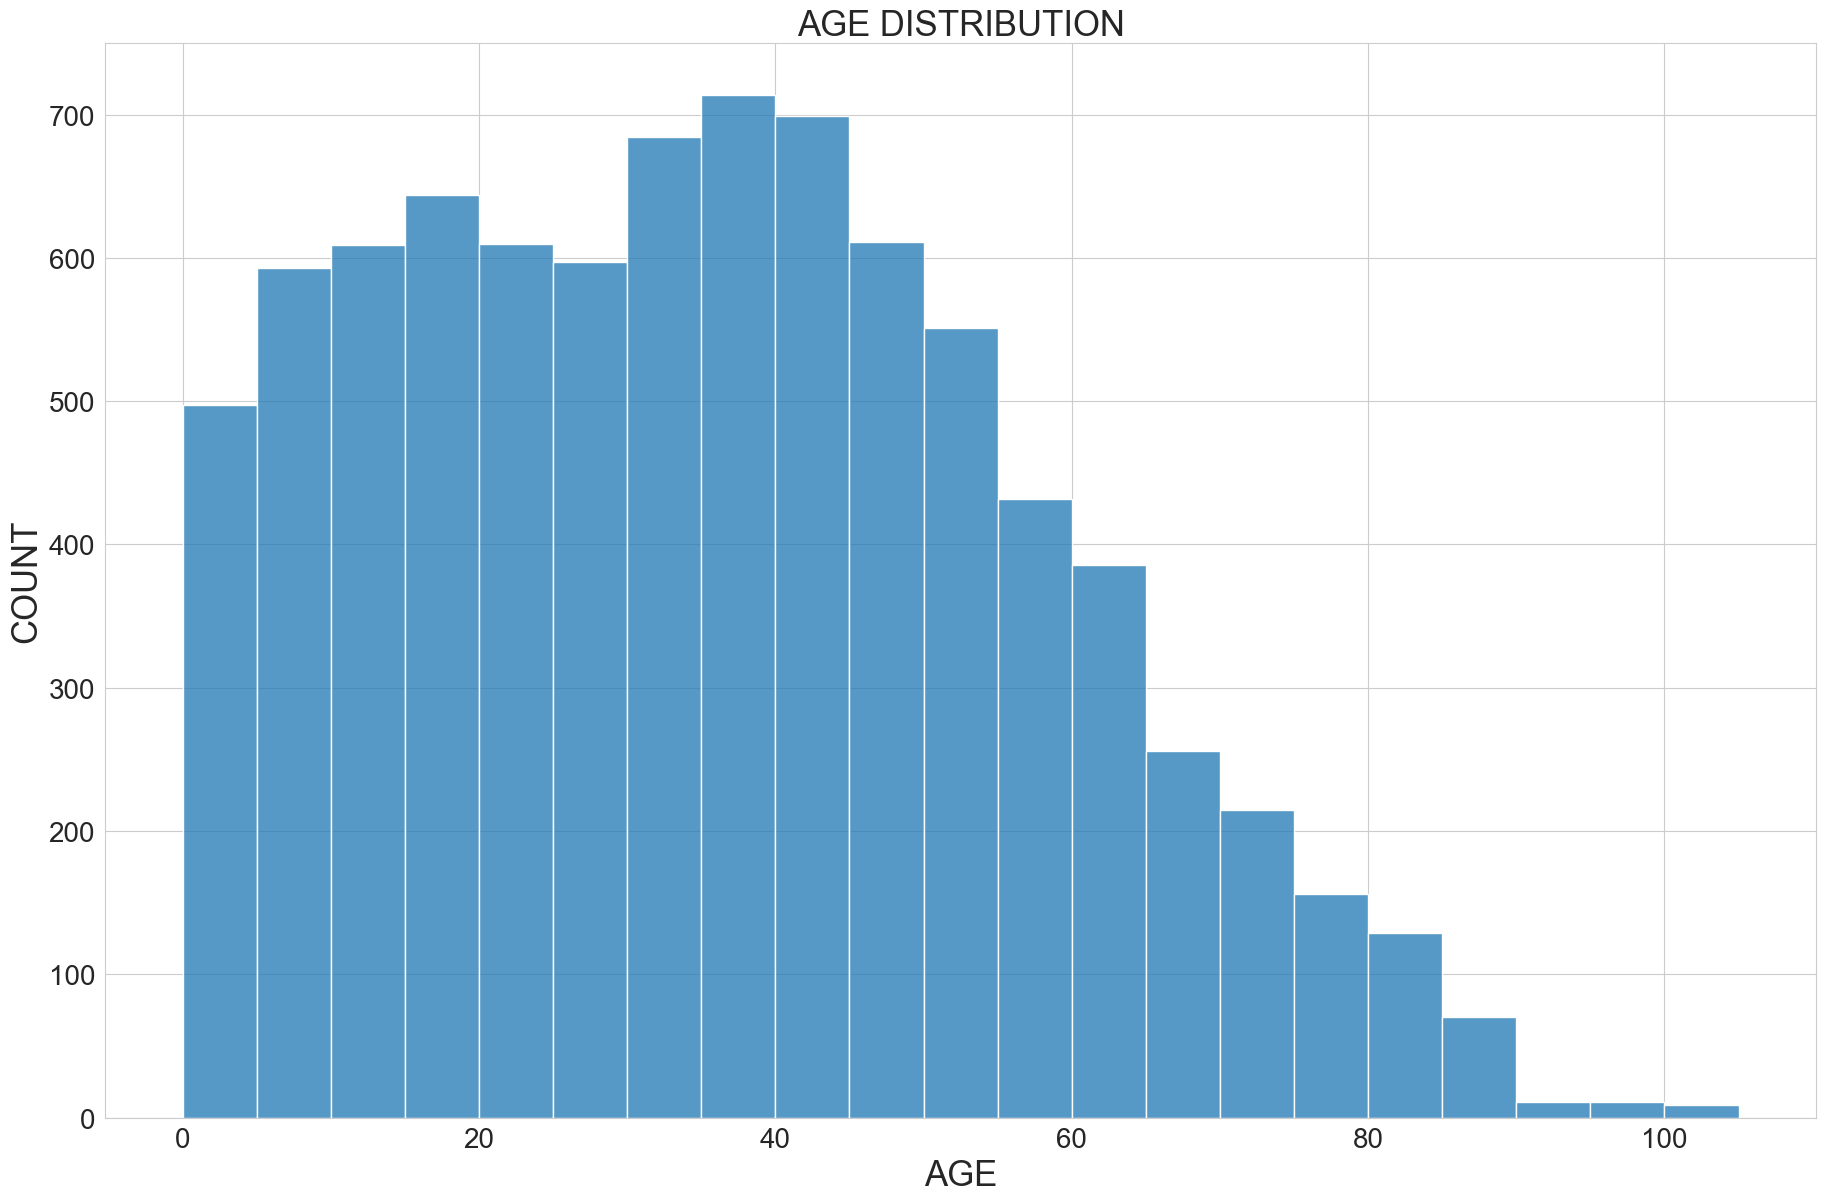

In [172]:
sns.set_style('whitegrid')
num_bins = int((census_data_copy['Age'].max() - census_data_copy['Age'].min()) / bin_width) #get num of bins
age_distribution_plot = sns.displot(census_data_copy, x='Age', bins=num_bins,
                                    height=7, aspect = 2.4)

plt.title('AGE DISTRIBUTION', fontsize=title_fontsize)
plt.xlabel('AGE', fontsize=label_fontsize)
plt.ylabel('COUNT', fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)


plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches) # gcf() stands for get current figure
plt.show()

#add to created plots
created_plots['age_distribution_plot'] = age_distribution_plot

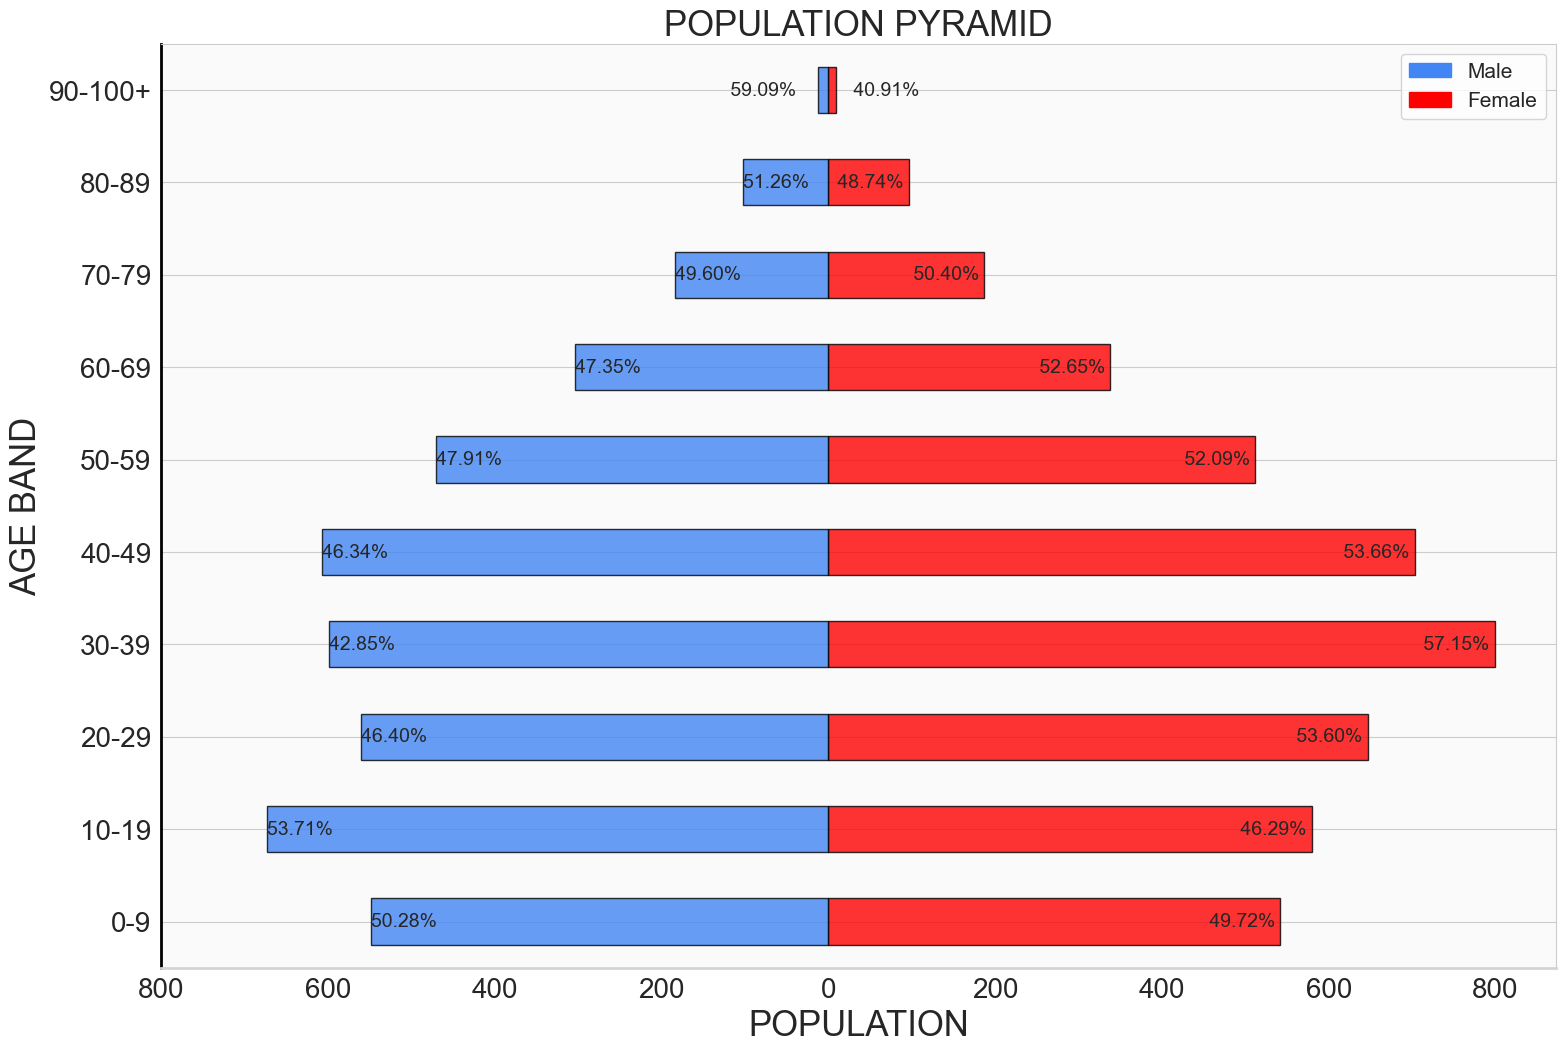

In [173]:
# Calculate percentage for each age group in the population.
bins = np.arange(census_data_copy['Age'].max(), step= 10)
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100+']
census_data_copy['Age Band'] = pd.cut(census_data_copy['Age'], bins=bins, labels=labels, right=False)
age_gender_counts = census_data_copy.groupby(['Age Band', 'Gender']).size().unstack()

age_gender_counts['Male'] = - age_gender_counts['Male']


# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(size_inches))

# Plot the data as a stacked horizontal bar chart
age_gender_counts.plot.barh(stacked=True, ax=ax,
                            color=[secondary_color,primary_color], 
                            alpha=0.8, edgecolor='black')


# Customize the axis labels and tick labels
ax.set_xlabel('POPULATION', fontsize=label_fontsize)
ax.set_ylabel('AGE BAND', fontsize=label_fontsize)
ax.tick_params(axis='both', which='major', labelsize=params_fontsize)

# Add a legend with custom labels and formatting
legend_labels = ['Male','Female']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in [primary_color, secondary_color]]
ax.legend(legend_handles, legend_labels, loc='upper right', fontsize=legend_fontsize)

# setting percentage to gender per band percentage
for i, (idx, row) in enumerate(age_gender_counts.iterrows()):
    total = sum(row)
    gen_total = abs(row["Female"]) + abs(row["Male"])
    if gen_total > 26:
        xpos = total 
        ypos = i
        ax.text(xpos - abs(row["Female"]), ypos, f'{abs((row["Male"]/gen_total)*100):.2f}% ', ha='left', va='center', fontsize=params_fontsize-6)
        ax.text(xpos + abs(row["Male"]), ypos, f' {abs((row["Female"]/ gen_total)*100):.2f}% ', ha='right', va='center', fontsize=params_fontsize-6)
    else:
        xpos = total 
        ypos = i
        ax.text(xpos - 120, ypos, f' {abs((row["Male"]/gen_total)*100):.2f}% ', ha='left', va='center', fontsize=params_fontsize-6)
        ax.text(xpos + 120, ypos, f' {abs((row["Female"]/ gen_total)*100):.2f}% ', ha='right', va='center', fontsize=params_fontsize-6)
# Add a title
ax.set_title('POPULATION PYRAMID', fontsize=title_fontsize)

# Set the background color and add the top and right spines
x_tick_labels = [f"{abs(x)}" for x in range(-800, 1000, 200)]
ax.set_xticks(range(-800, 1000, 200))
ax.set_xticklabels(x_tick_labels)

ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('#000000')
ax.spines['bottom'].set_color('#D4D4D4')

ax.set_facecolor('#FAFAFA')

# Display the chart
plt.grid(axis='x')
plt.savefig('./visualisation/population_pyramid.png',
                    dpi=90, bbox_inches='tight', format='png', transparent = True)

plt.show()

In [174]:
age_band_counts = census_data_copy['Age Band'].value_counts()
age_band_percentage = round((age_band_counts / population_size) * 100, 2)

# Convert to dataframe
age_band_percentage = age_band_percentage.reset_index()
age_band_percentage.columns = ['Age Band', 'Percentage (%)']

# Sort by Age Band
age_band_percentage = age_band_percentage.sort_values(by='Age Band')
age_band_percentage = age_band_percentage.transpose()
age_band_percentage.columns = ['']*len(age_band_percentage.columns)
age_band_percentage

,,,,,,,,,,
Age Band,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-100+
Percentage (%),12.85,14.77,14.23,16.48,15.44,11.59,7.57,4.37,2.35,0.26


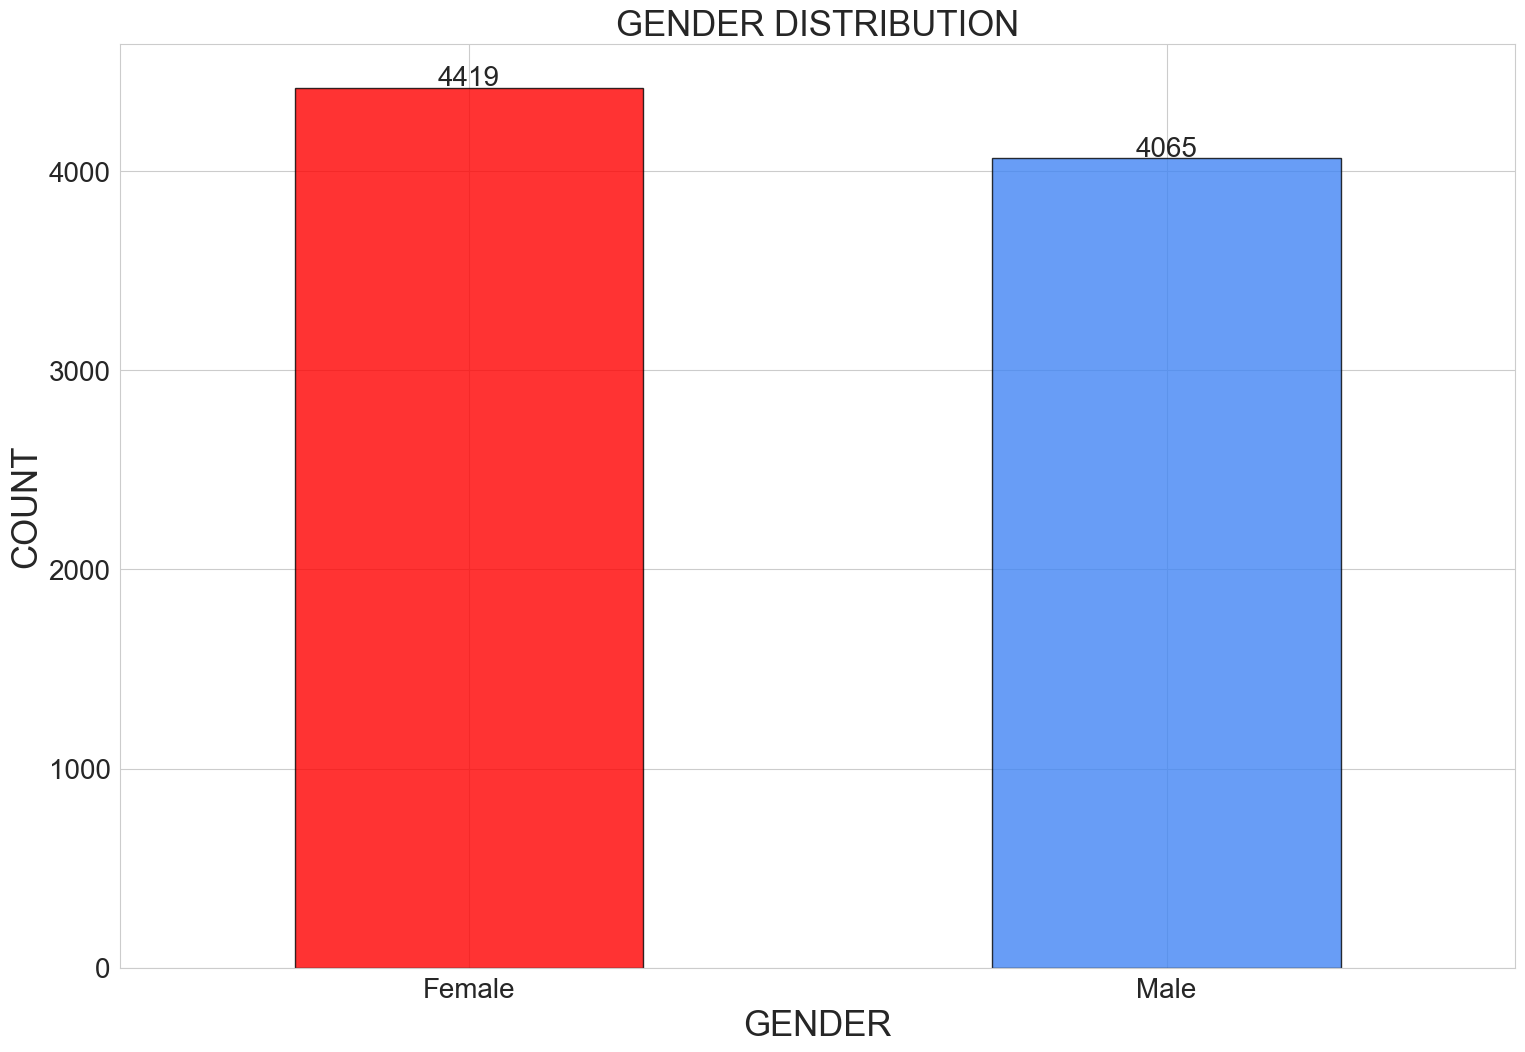

In [175]:
# get gender counts
gender_counts = census_data_copy['Gender'].value_counts().to_frame().reset_index()

# Rename the columns
gender_counts.columns = ['Gender', 'Count']

# Create the bar plot
fig, ax = plt.subplots()
gender_counts.plot.bar(x='Gender', y='Count', 
                       ax=ax, color=[secondary_color, primary_color], 
                       alpha=0.8, edgecolor='black',legend=False)

ax.set_xlabel('GENDER', fontsize=label_fontsize)
ax.set_ylabel('COUNT', fontsize=label_fontsize)
ax.set_title('GENDER DISTRIBUTION', fontsize=title_fontsize)
ax.tick_params(axis='both', labelsize=params_fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the count values above each bar
for i, v in enumerate(gender_counts['Count']):
    ax.text(i, v+10, str(v), ha='center', fontsize=params_fontsize)

# Add a horizontal grid

plt.xticks(rotation=0)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches) # gcf() stands for get current figure
ax.yaxis.grid(True)
# Show the plot
plt.savefig('./visualisation/gender_distribution.png',
                    dpi=90, bbox_inches='tight', format='png', transparent = True)

plt.show()

In [176]:
# calculating male population
male_percentage = (census_data_copy['Gender'].value_counts(normalize=True)['Male'])*100

print(f"Male Population : {male_percentage:.2f}%")

Male Population : 47.91%


In [177]:
# calculating female population
female_percentage = (census_data_copy['Gender'].value_counts(normalize=True)['Female'])*100

print(f"Female Population : {female_percentage:.2f}%")

Female Population : 52.09%


### Marital Status

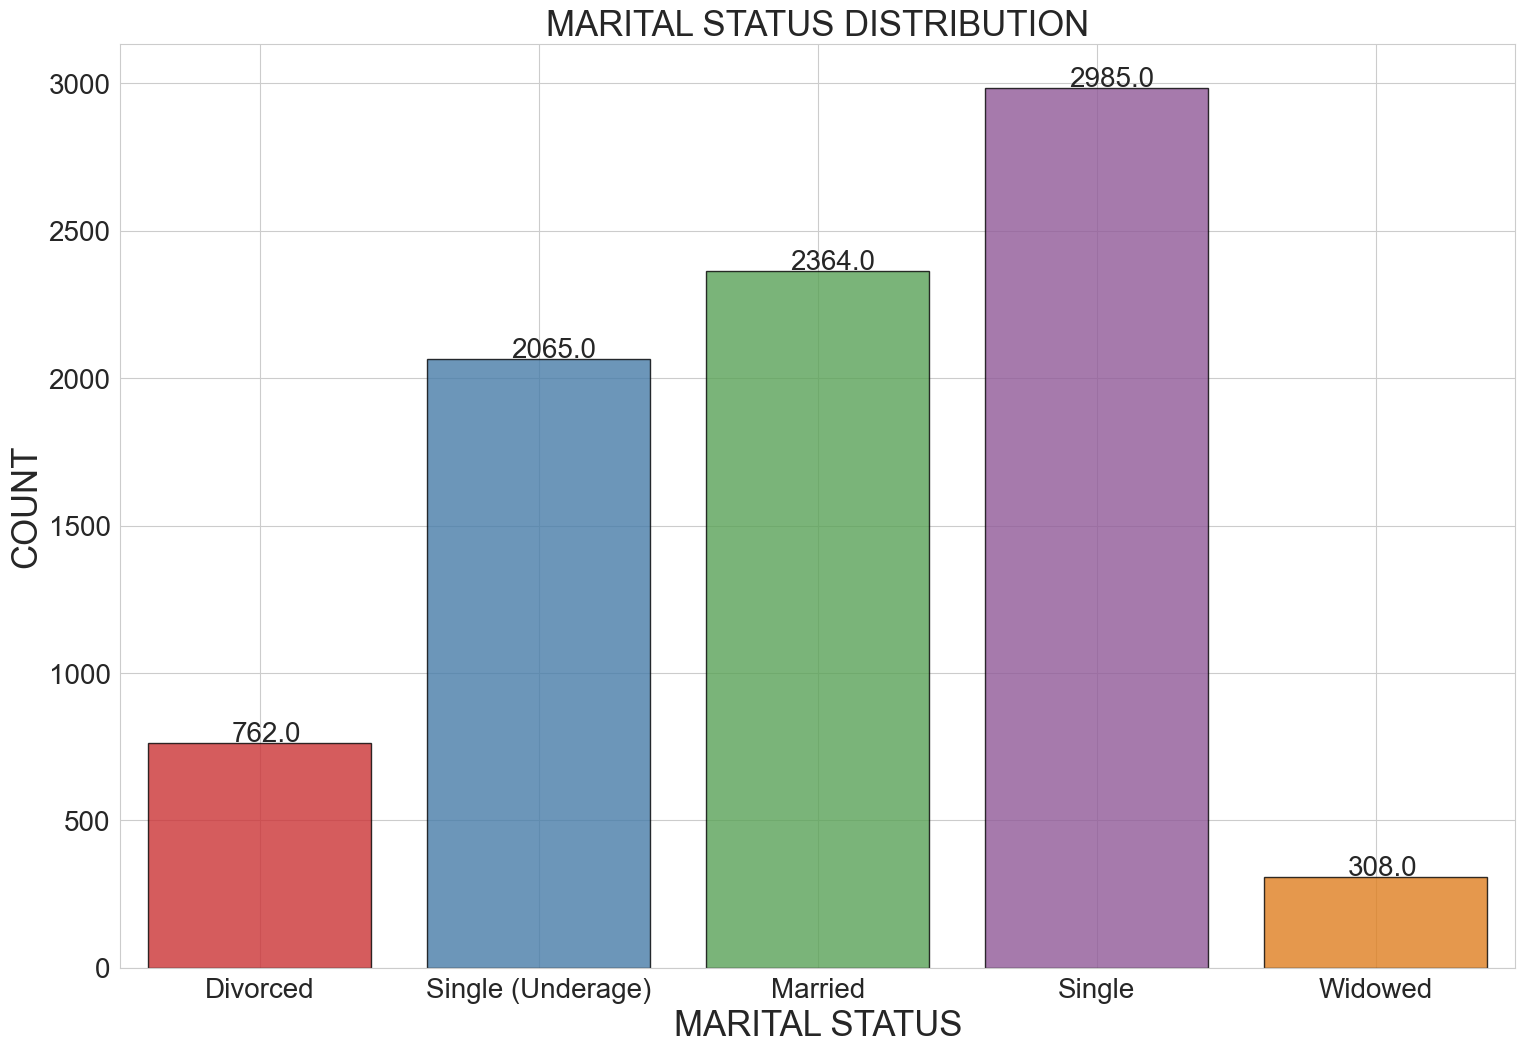

In [178]:
# marital status plot
marital_status_distribution_plot = sns.countplot(
    x="Marital Status", data=census_data_copy, palette="Set1", alpha=0.8, edgecolor='black')

# Add counts to each bar
for p in marital_status_distribution_plot.patches:
    marital_status_distribution_plot.annotate(f'{p.get_height()}', 
                (p.get_x()+0.3, p.get_height()+5), fontsize=params_fontsize )


# set plot title and fontsize
plt.title("MARITAL STATUS DISTRIBUTION", fontsize= title_fontsize)
plt.xlabel('MARITAL STATUS', fontsize= label_fontsize)
plt.ylabel('COUNT', fontsize= label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.grid(axis='x')

# Show plot
plt.gcf().set_size_inches(size_inches)
plt.savefig('./visualisation/marital_status_distribution_plot.png',
                    dpi=90, bbox_inches='tight', format='png', transparent = True)
plt.show()


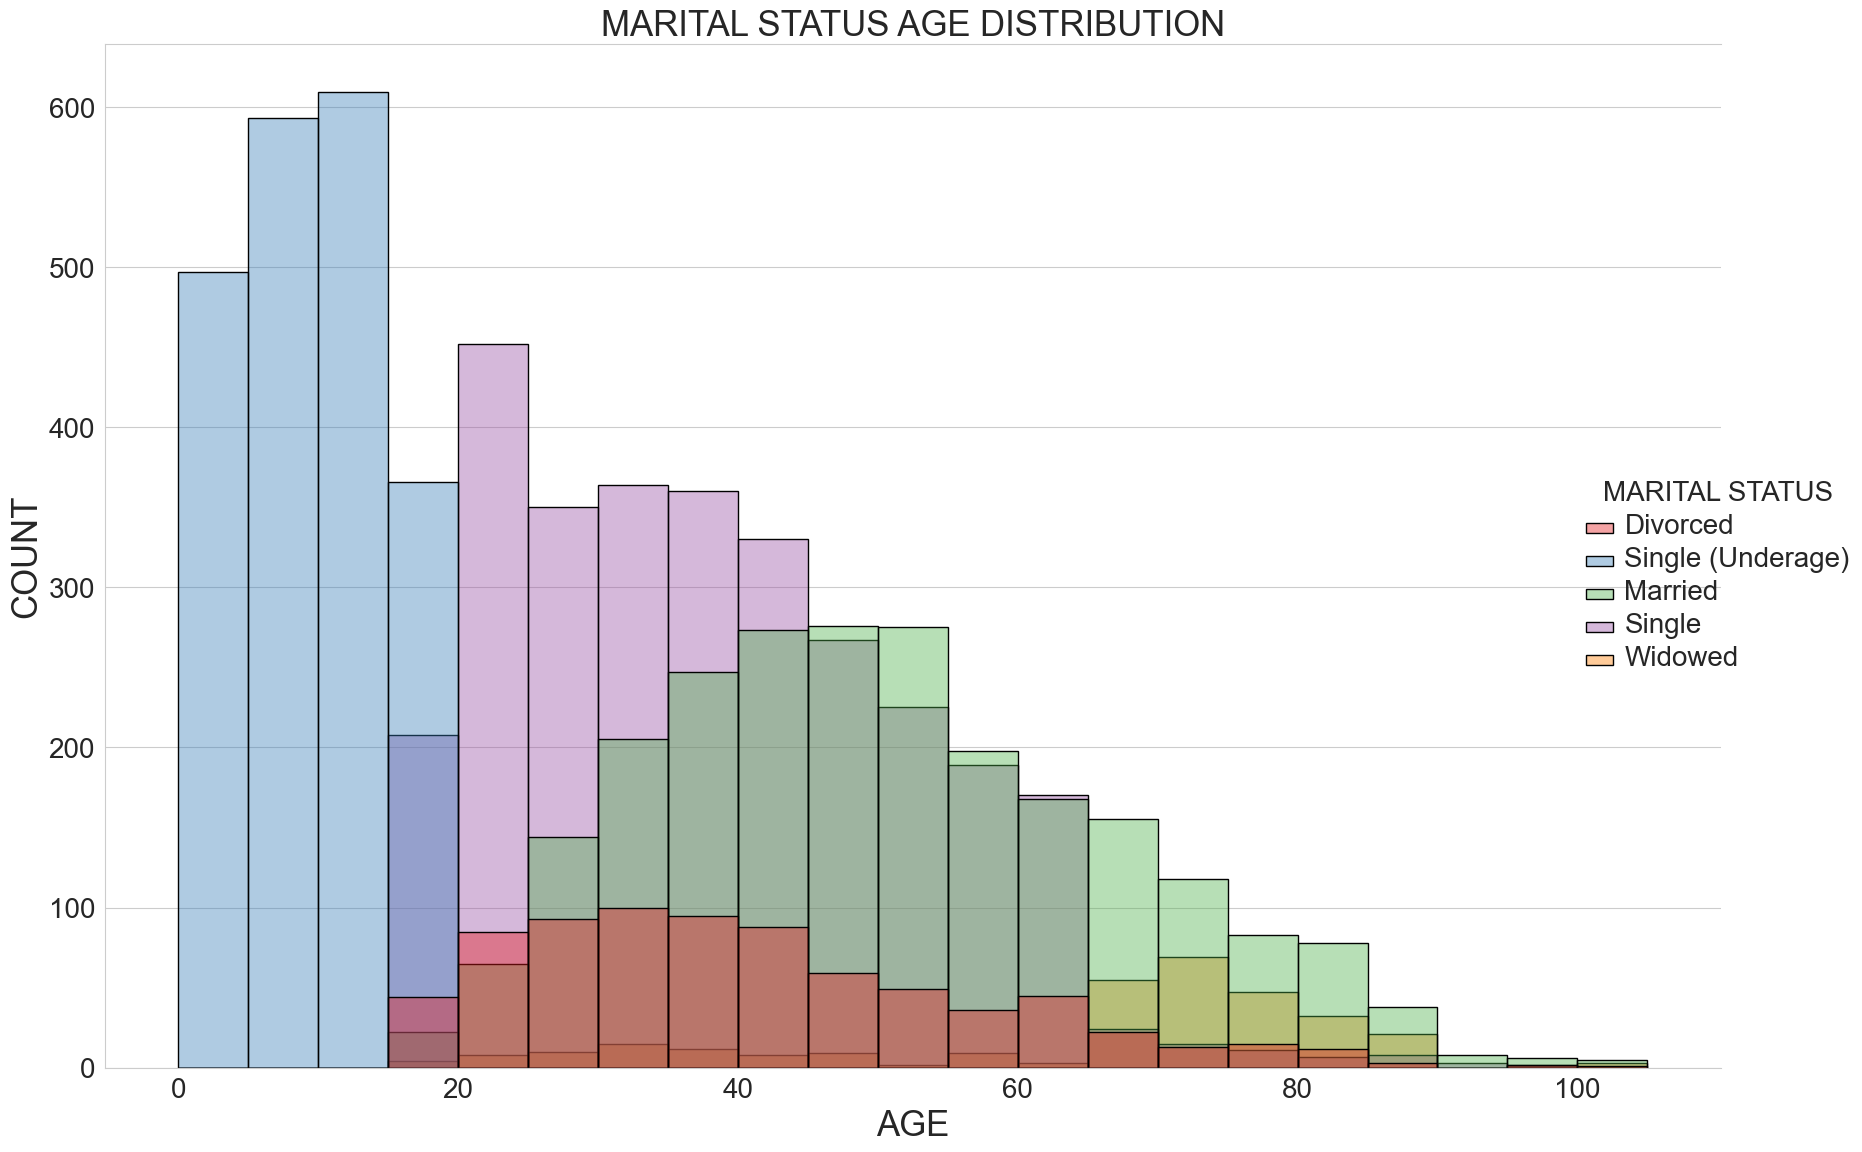

In [179]:
# creating age_condition_married_distributions_plot
age_condition_married_distributions_plot = sns.displot(
    data=census_data_copy,
    x='Age', palette='Set1',
    hue='Marital Status', 
    aspect=5,alpha=0.4, 
    bins=num_bins,
    edgecolor='black', 
    legend= True)

# set plot title and fontsize
plt.xlabel('AGE', fontsize= label_fontsize)
plt.ylabel('COUNT', fontsize= label_fontsize)
plt.title('MARITAL STATUS AGE DISTRIBUTION', fontsize= title_fontsize)

# Get the legend object from the plot
legend = age_condition_married_distributions_plot._legend

# Set the title and fontsize of the legend
legend.set_title('MARITAL STATUS', prop={'size': params_fontsize})

# Set the fontsize of the legend labels
for text in legend.texts:
    text.set_fontsize(params_fontsize)

plt.grid(axis='x')
plt.tick_params(labelsize=params_fontsize)
plt.gcf().set_size_inches(size_inches)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(False)
plt.show()

#add to created plots
created_plots['age_condition_married_distributions_plot'] = age_condition_married_distributions_plot

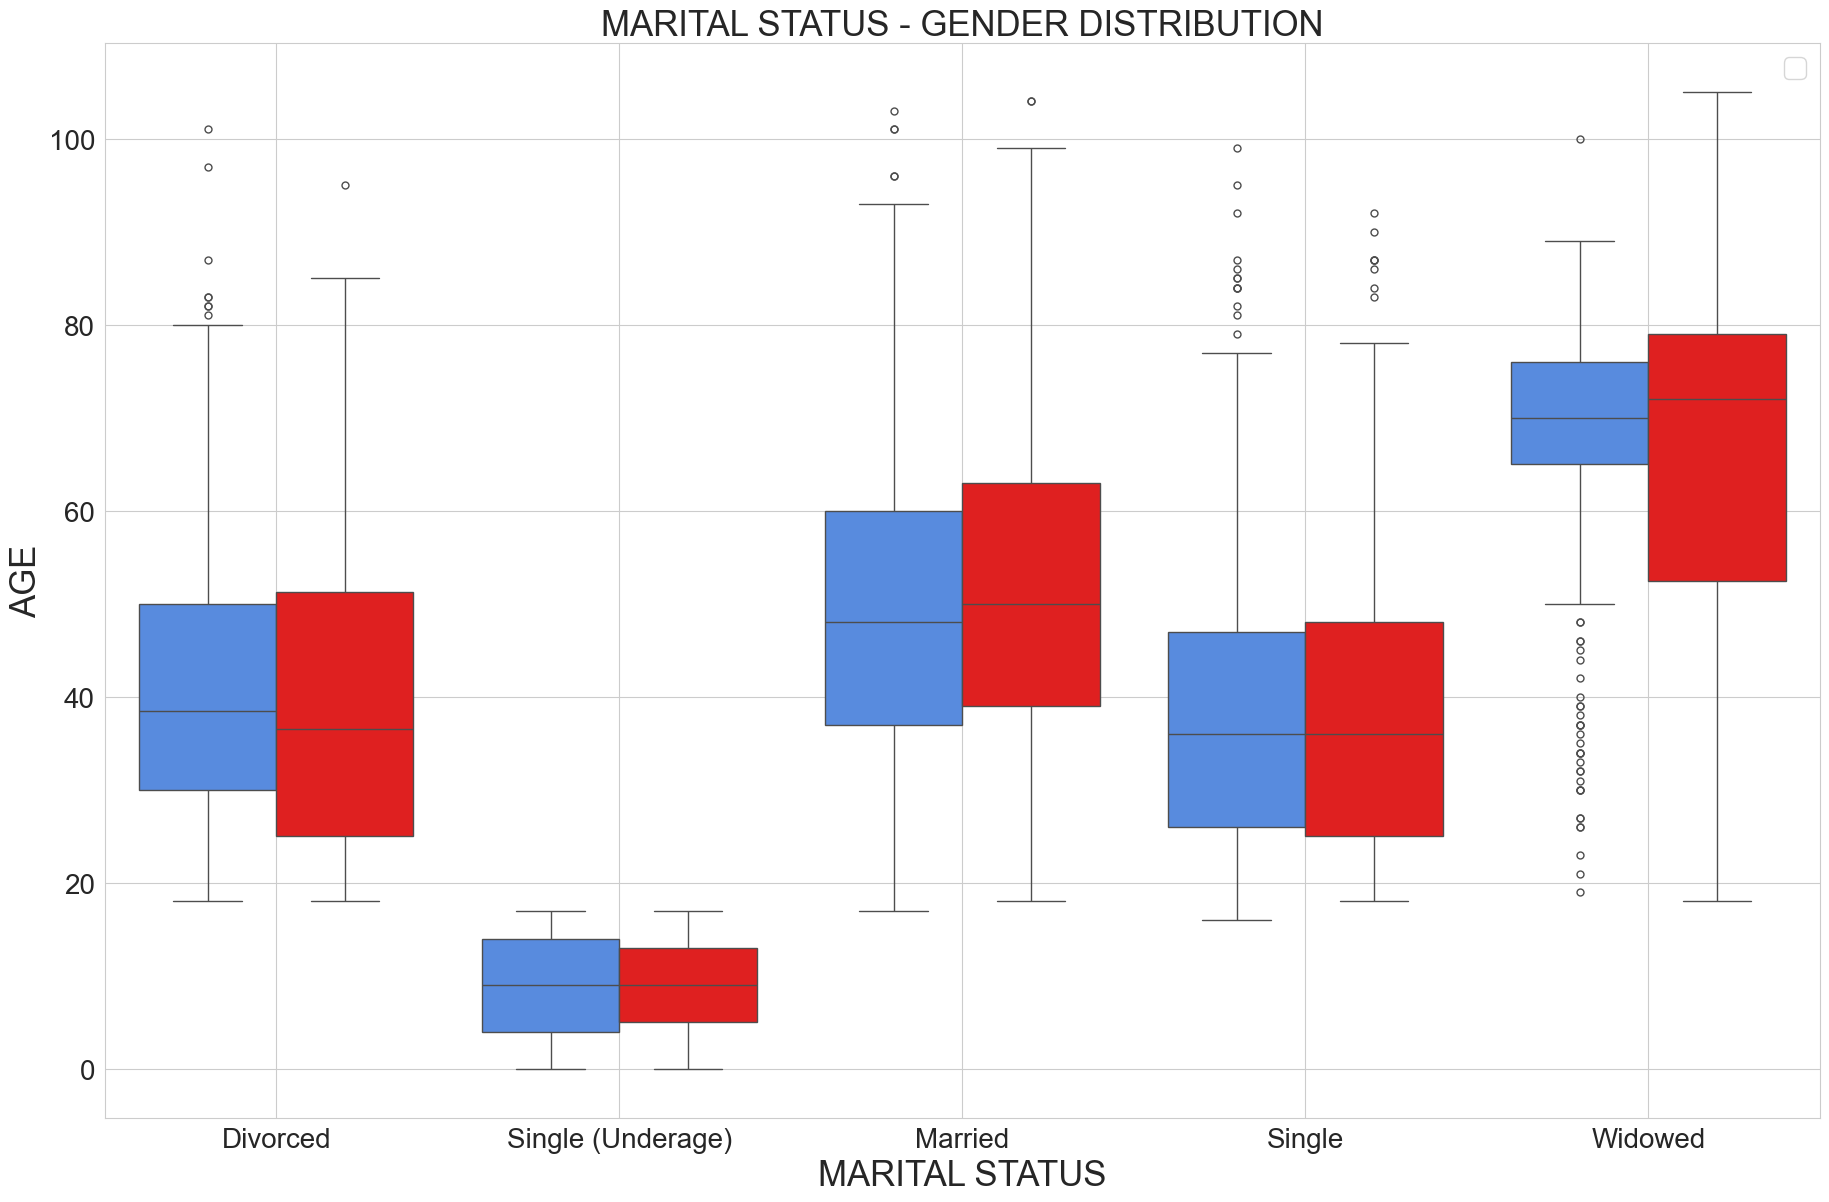

In [180]:
# Gender marital status
gender_marital_status_plot = sns.catplot(
    data=census_data_copy, kind="box", aspect=2.5,
    y="Age", x="Marital Status", hue="Gender",palette=[primary_color, secondary_color],
    height=7, legend=False
)
plt.grid("on")

# Add labels to the plot
plt.title("MARITAL STATUS - GENDER DISTRIBUTION", fontsize=title_fontsize)
plt.xlabel("MARITAL STATUS", fontsize=label_fontsize)
plt.ylabel("AGE", fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.legend(fontsize=params_fontsize)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches)
plt.show()

# add to created plots
created_plots['gender_marital_status_plot'] = gender_marital_status_plot

In [181]:
# Group the data by Age and Marital Status
marital_status_age = census_data_copy.groupby(['Age', 'Marital Status']).size().reset_index(name='count')

# Filter the data to only include currently married individuals
married_data = marital_status_age[marital_status_age['Marital Status'] == 'Married']
most_common_ages = married_data[married_data['count'] == married_data['count'].max()]['Age'].tolist()
print('Most Common Age(s) for Married Individuals:', most_common_ages)

# Filter the data to only include currently Single individuals
single_married_data = marital_status_age[marital_status_age['Marital Status'] == 'Single']

print('Most Common Age for Single Individuals:')
print(int(single_married_data[single_married_data['count'] == single_married_data['count'].max()]['Age']))

Most Common Age(s) for Married Individuals: [49, 52]
Most Common Age for Single Individuals:
20


In [182]:
# get marrital status count
marrital_status_count = census_data_copy['Marital Status'].value_counts().to_frame().transpose().reset_index()
marrital_status_count

Marital Status,index,Single,Married,Single (Underage),Divorced,Widowed
0,count,2985,2364,2065,762,308


In [183]:
# get marrital status percentage in the  population
martial_status_population_percent = (census_data_copy['Marital Status'].value_counts(normalize=True)*100).to_frame().transpose().reset_index()
martial_status_population_percent.round(2)

Marital Status,index,Single,Married,Single (Underage),Divorced,Widowed
0,proportion,35.18,27.86,24.34,8.98,3.63


In [184]:
# married population Gender Percentage 
married_by_gender_percent = census_data_copy[census_data_copy['Marital Status'] == 'Married']['Gender'].value_counts(normalize=True)*100
married_by_gender_percent.round(2)


Gender
Female    50.3
Male      49.7
Name: proportion, dtype: float64

In [185]:
# divorced population Gender percentage
married_by_gender_percent = census_data_copy[census_data_copy['Marital Status'] == 'Divorced']['Gender'].value_counts(normalize=True)*100
married_by_gender_percent.round(2)

Gender
Female    62.2
Male      37.8
Name: proportion, dtype: float64

In [186]:
# widowed population gender percentage
married_by_gender_percent = census_data_copy[census_data_copy['Marital Status'] == 'Widowed']['Gender'].value_counts(normalize=True)*100
married_by_gender_percent.round(2)

Gender
Female    57.47
Male      42.53
Name: proportion, dtype: float64

In [187]:
# single popuplation gender percentge
married_by_gender_percent = census_data_copy[census_data_copy['Marital Status'] == 'Single']['Gender'].value_counts(normalize=True)*100
married_by_gender_percent.round(2)

Gender
Female    53.37
Male      46.63
Name: proportion, dtype: float64

In [188]:
# single underage popuplation gender percentge
married_by_gender_percent = census_data_copy[census_data_copy['Marital Status'] == 'Single (Underage)']['Gender'].value_counts(normalize=True)*100
married_by_gender_percent.round(2)

Gender
Male      52.25
Female    47.75
Name: proportion, dtype: float64

### Religion

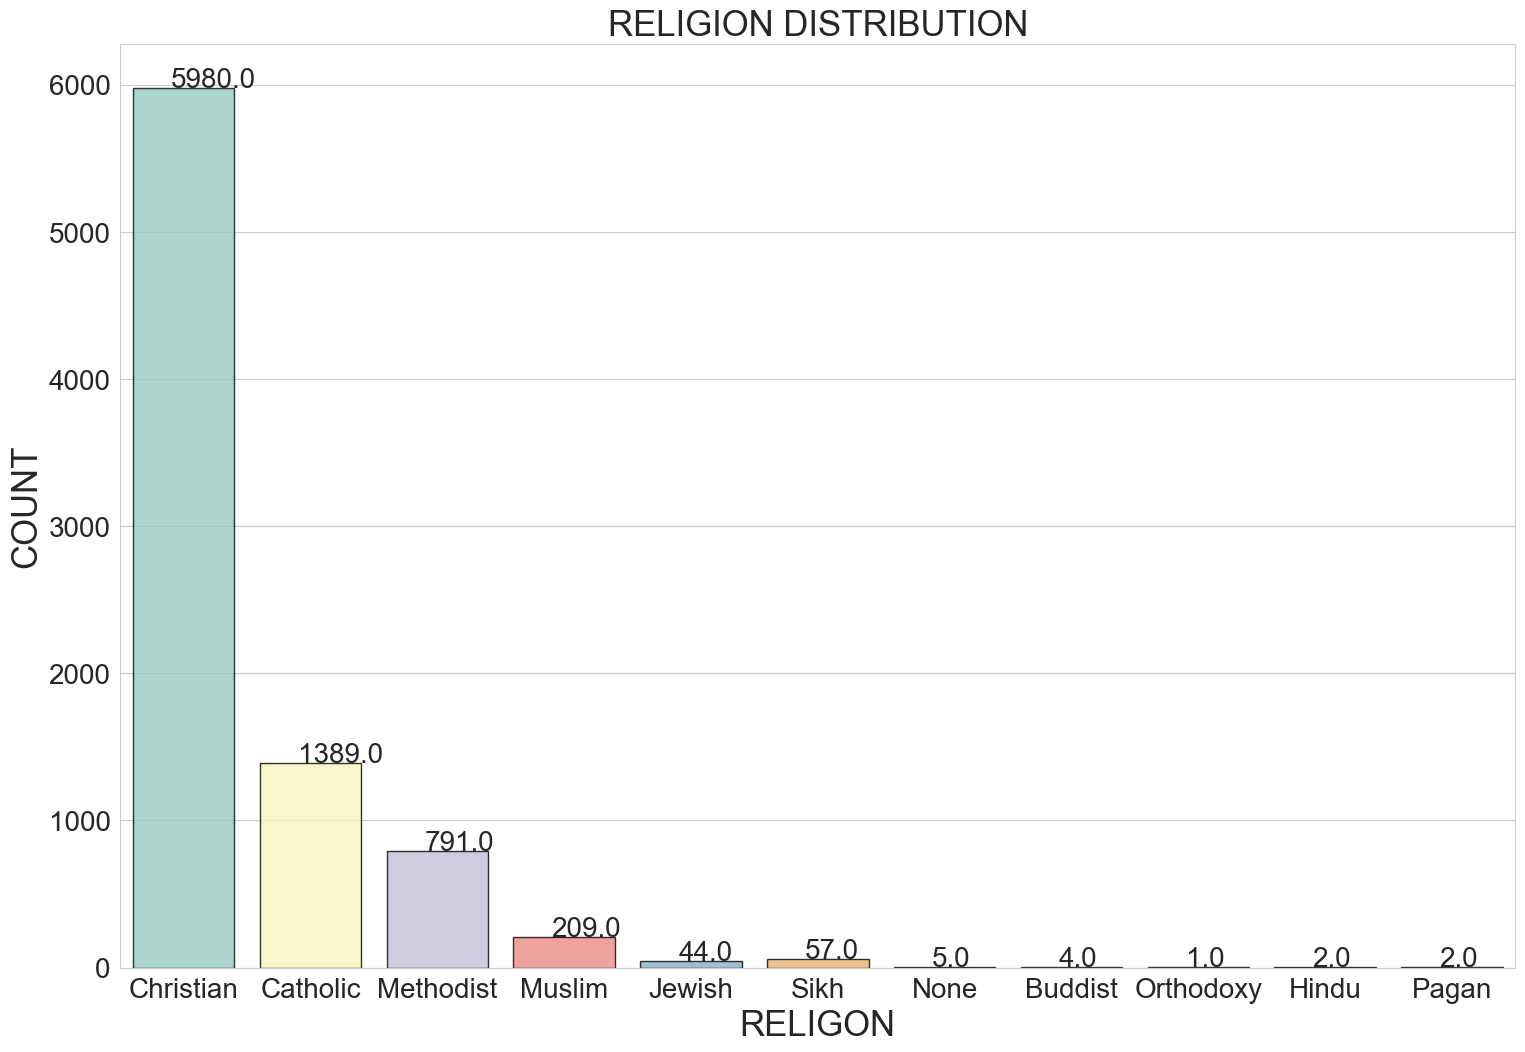

In [189]:
# religion distribution plot
religion_distribution_plot = sns.countplot(
    x="Religion", data=census_data_copy, palette="Set3", alpha=0.8, edgecolor='black')

# Add counts to each bar
for p in religion_distribution_plot.patches:
    religion_distribution_plot.annotate(f'{p.get_height()}', 
                (p.get_x()+0.3, p.get_height()+5), fontsize= params_fontsize)


# set plot title and fontsize
plt.xlabel('RELIGON', fontsize= label_fontsize)
plt.ylabel('COUNT', fontsize= label_fontsize)
plt.tick_params(labelsize=params_fontsize)

plt.title("RELIGION DISTRIBUTION", fontsize= title_fontsize)

# Show plot

plt.gcf().set_size_inches(size_inches) 
plt.savefig('./visualisation/religion_distribution_plot.png',
                    dpi=90, bbox_inches='tight', format='png', transparent = True)
plt.show()

In [190]:
# religion population percentage
religion_population_percent = (census_data_copy['Religion'].value_counts(normalize=True)*100).to_frame().transpose().reset_index()
religion_population_percent.round(2)


Religion,index,Christian,Catholic,Methodist,Muslim,Sikh,Jewish,None,Buddist,Hindu,Pagan,Orthodoxy
0,proportion,70.49,16.37,9.32,2.46,0.67,0.52,0.06,0.05,0.02,0.02,0.01


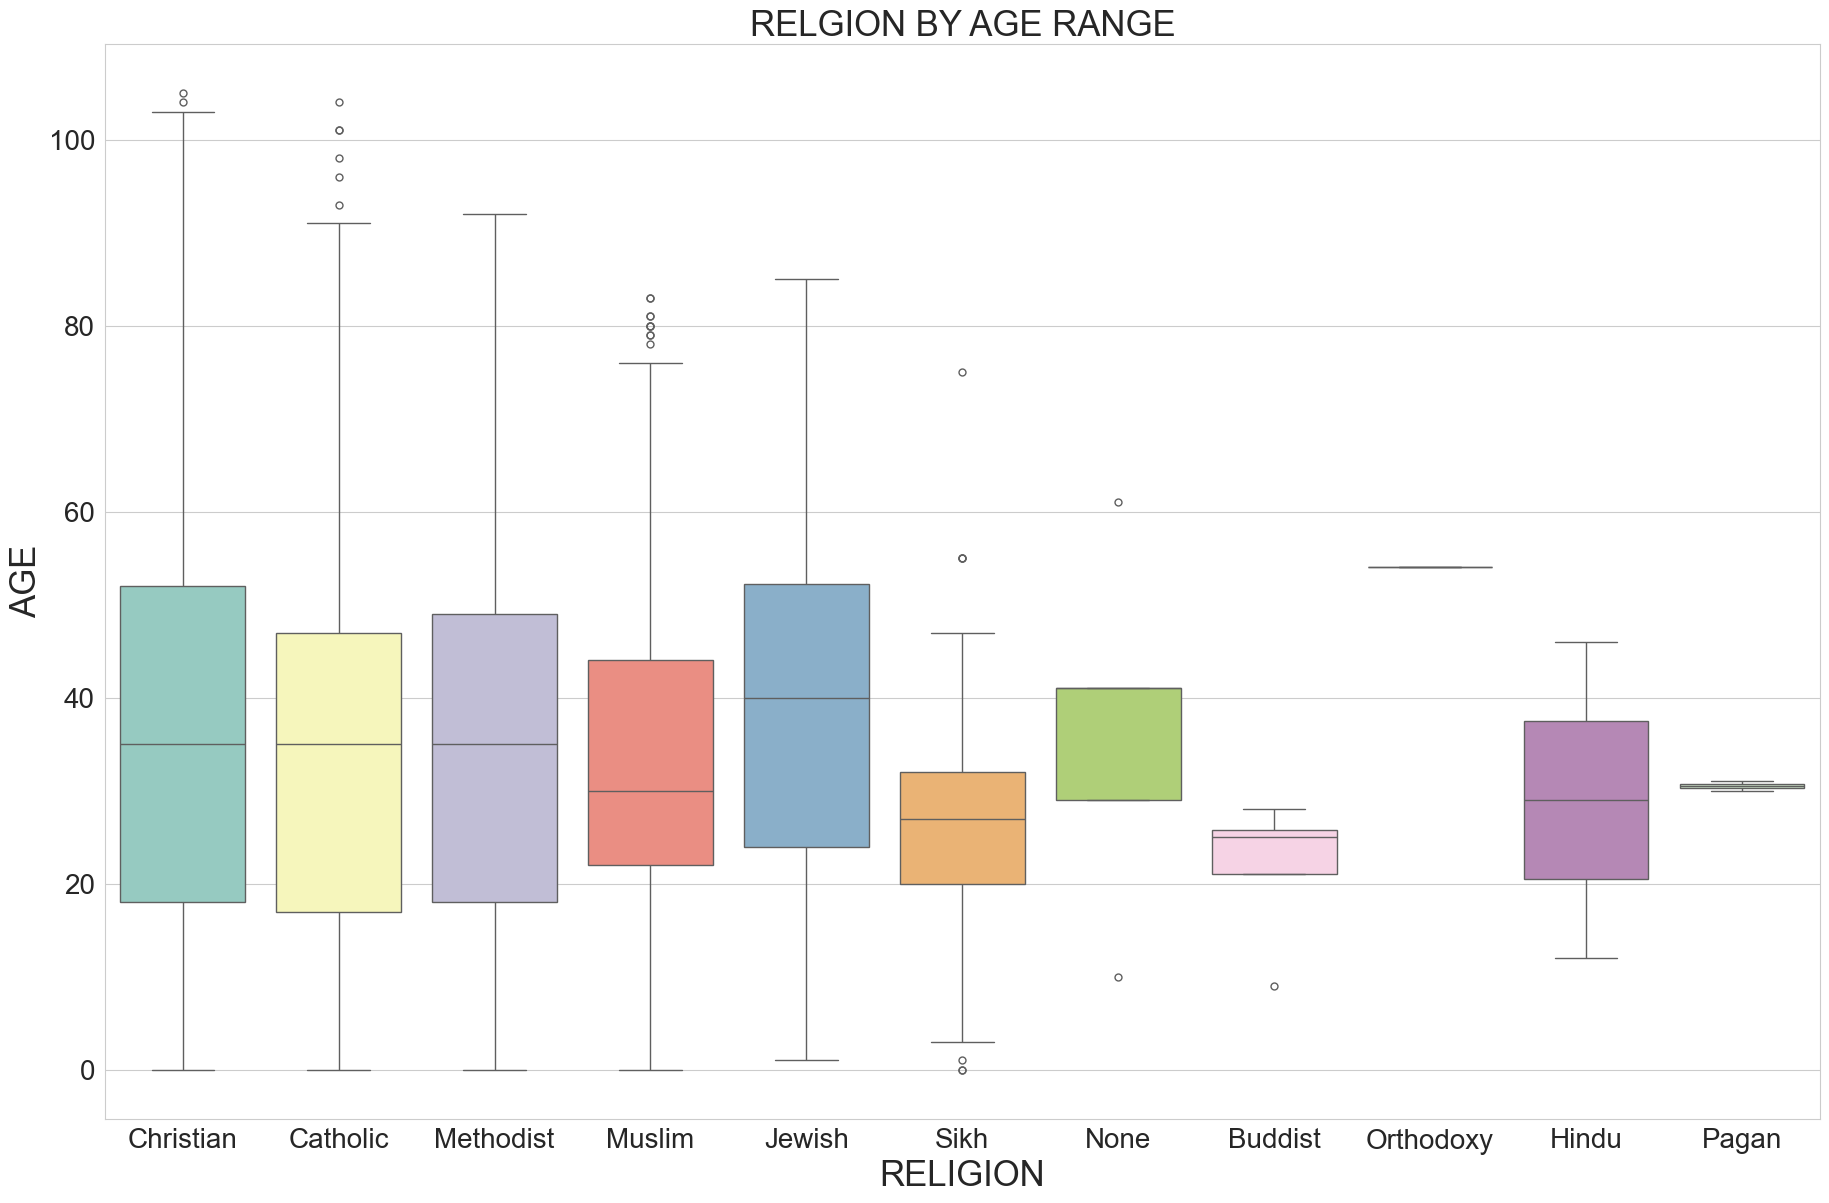

In [191]:
# Plot a box and whisker plot for the age range per religion
age_religion_plot = sns.catplot(x="Religion",  kind="box", aspect=2.5, 
                                y="Age", data=census_data_copy, palette='Set3',
                                height=7, legend=False)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels to the plot
plt.title("RELGION BY AGE RANGE", fontsize=title_fontsize)
plt.xlabel("RELIGION", fontsize=label_fontsize)
plt.ylabel("AGE", fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches)

# Show the plot
plt.show()

#add to created plots
created_plots['age_religion_plot'] = age_religion_plot

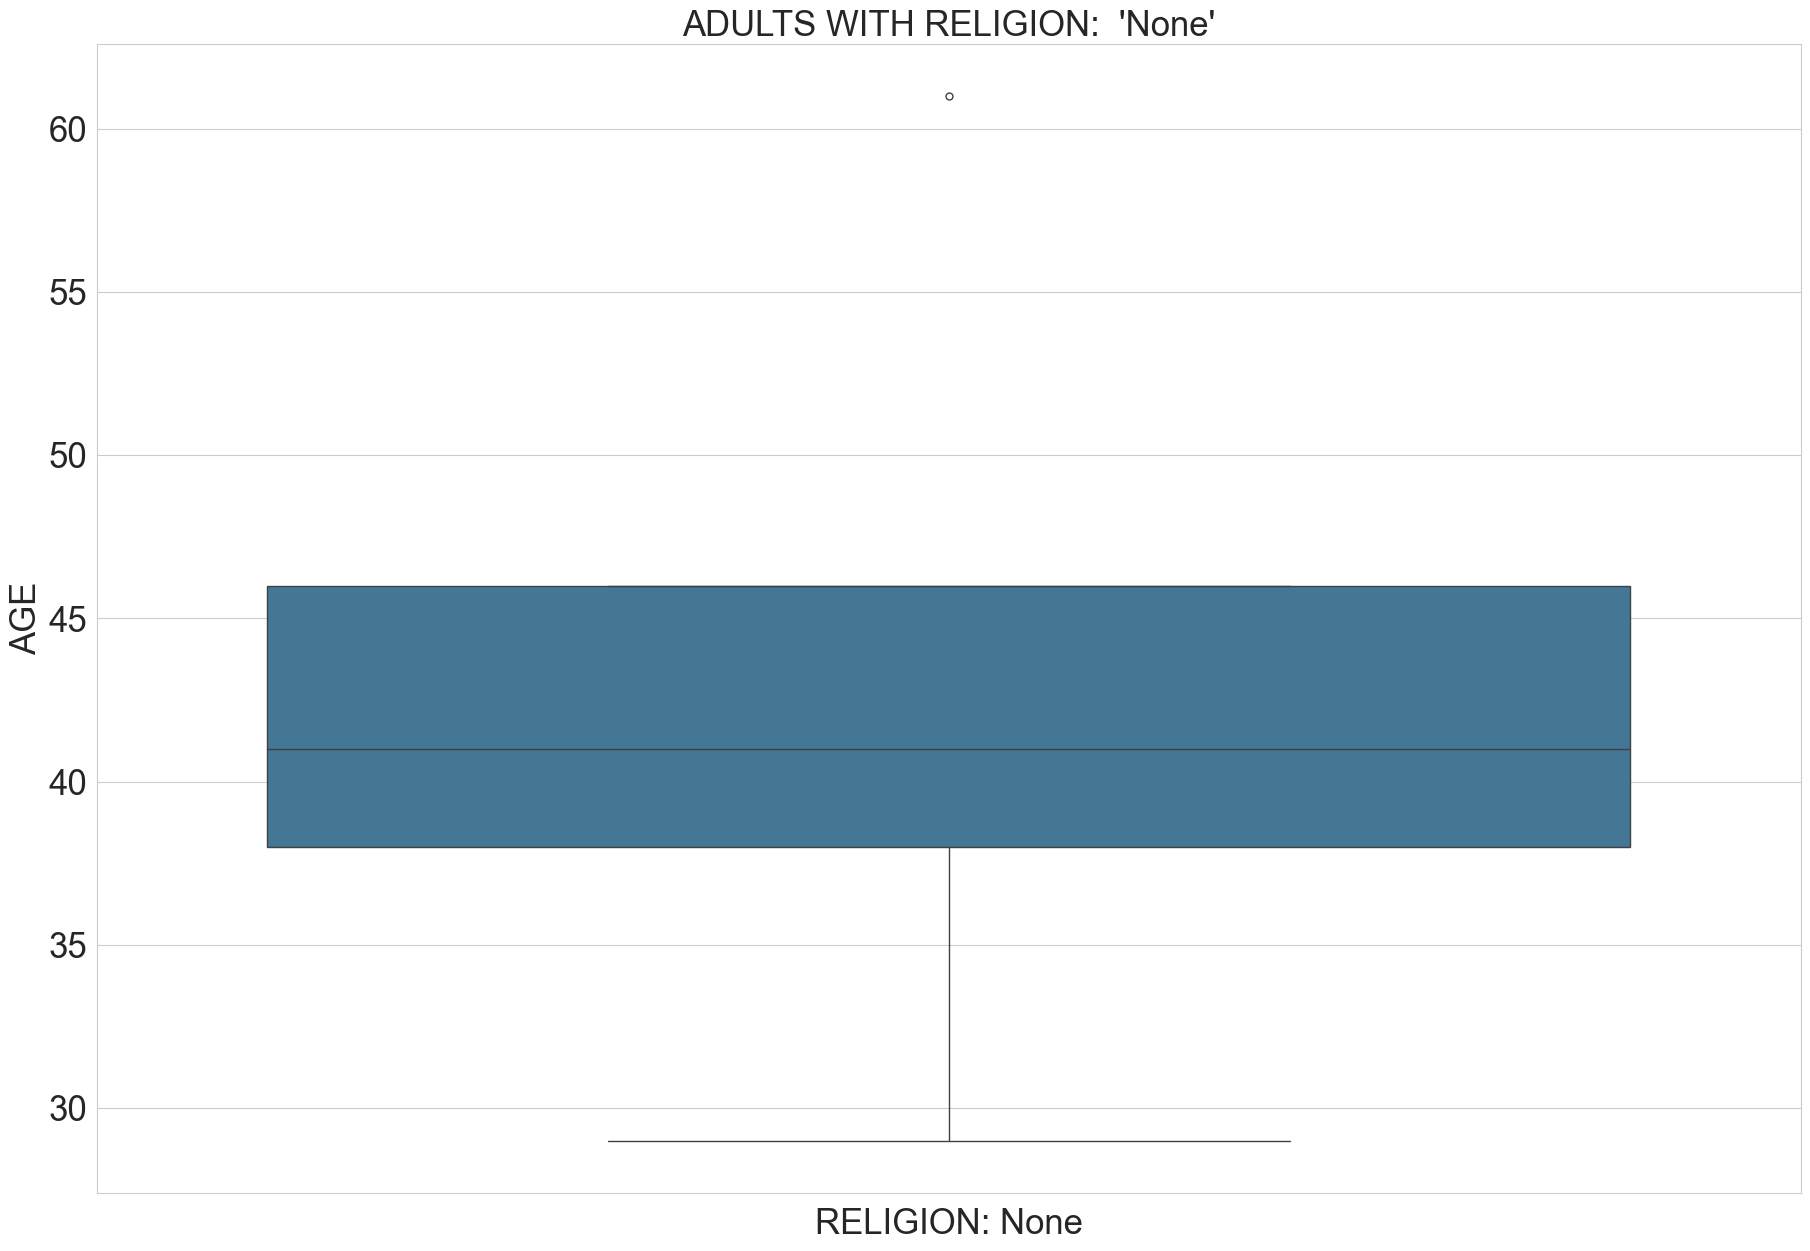

In [192]:
#Filter the dataframe to include only records where Religion is 'None' and Age is 18 or above
adults_with_religion_none = census_data_copy[(census_data_copy["Age"] >= 18) & 
                                             (census_data_copy["Religion"] == "None")]

# Create the box and whisker plot for the age range of adults with Religion 'None'
adults_with_religion_none_plot = sns.catplot( kind="box", aspect=2, y="Age", 
                                             height=7, legend=False,
                                             data=adults_with_religion_none, palette='mako')

# Add labels to the plot
plt.title("ADULTS WITH RELIGION:  'None'", fontsize=title_fontsize)
plt.xlabel("RELIGION: None", fontsize=label_fontsize)
plt.ylabel("AGE", fontsize=label_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches)
# Show the plot
plt.show()

#add to created plots
created_plots['adults_with_religion_none_plot'] = adults_with_religion_none_plot

In [193]:
# Group the data by "Religion" and calculate the average (mean, median, and mode) age for each religion
average_age_by_religion = census_data_copy.groupby('Religion')['Age'].agg(['mean', 'median', lambda x: x.mode().iat[0]])

# Rename the columns for better understanding
average_age_by_religion.columns = ['Mean Age', 'Median Age', 'Mode Age']

# Calculate the age range
age_range = census_data_copy['Age'].max() - census_data_copy['Age'].min()

# Compute the IQR (Interquartile Range) for the 'Age' column
Q1 = census_data_copy['Age'].quantile(0.25)
Q3 = census_data_copy['Age'].quantile(0.75)
IQR = Q3 - Q1
average_age_by_religion = average_age_by_religion.round()
average_age_by_religion.transpose()


Religion,Buddist,Catholic,Christian,Hindu,Jewish,Methodist,Muslim,None,Orthodoxy,Pagan,Sikh
Mean Age,22.0,34.0,36.0,29.0,38.0,36.0,33.0,36.0,54.0,30.0,25.0
Median Age,25.0,35.0,35.0,29.0,40.0,35.0,30.0,41.0,54.0,30.0,27.0
Mode Age,25.0,40.0,35.0,12.0,28.0,37.0,27.0,41.0,54.0,30.0,34.0


In [194]:
age_range, IQR

(np.int64(105), np.float64(32.0))

In [195]:
# Define a function to check if religion is transmitted from parents to child
def is_religion_transmitted(religions):
    # Check if there are more than 1 unique religion in the household
    # If all religions are the same, then consider it as religion transmitted
    if len(religions.unique()) == 1:
        return True
    return False

# Filter only parents and children from the "Relationship to Head of House" column
filter_parents_children = census_data_copy["Relationship to Head of House"].isin(["Head",
                                                                                  "Wife",'Husband'
                                                                                  "Son", 'Daughter'])

# Filter the dataframe by selecting only rows where relationship is parents or children
households_parents_children = census_data_copy[filter_parents_children]

# Group the records by House Number, Street, Surname, and apply the "is_religion_transmitted" function
# to check if religion is transmitted in each household
religion_transmission = households_parents_children.groupby(['House Number', 'Street', 'Surname'])['Religion'].apply(
    is_religion_transmitted).reset_index()

# Count the number of households where religion is transmitted
num_transmission_true = religion_transmission['Religion'].sum()

# Compute the frequency (proportion) of religion transmission by dividing the 
# number of true transmissions by the total number of households
frequency_religion_transmission = round(num_transmission_true / len(religion_transmission),  2)

print(f"The frequency of religion transmission from parents to children within households is approximately {round(frequency_religion_transmission, 2)}")

print(f"Number of households where religion is transmitted from parents to children: {num_transmission_true}")
print(f"Total number of households analyzed (where at least parents or children are present): {len(religion_transmission)}")
      

The frequency of religion transmission from parents to children within households is approximately 1.0
Number of households where religion is transmitted from parents to children: 2925
Total number of households analyzed (where at least parents or children are present): 2932


Note: In this case, a household is defined as a group of people with the same House Number, Street, and Surname. We considered that religion is transmitted within a household if all members (parents and children) have the same religion.

### Occupation

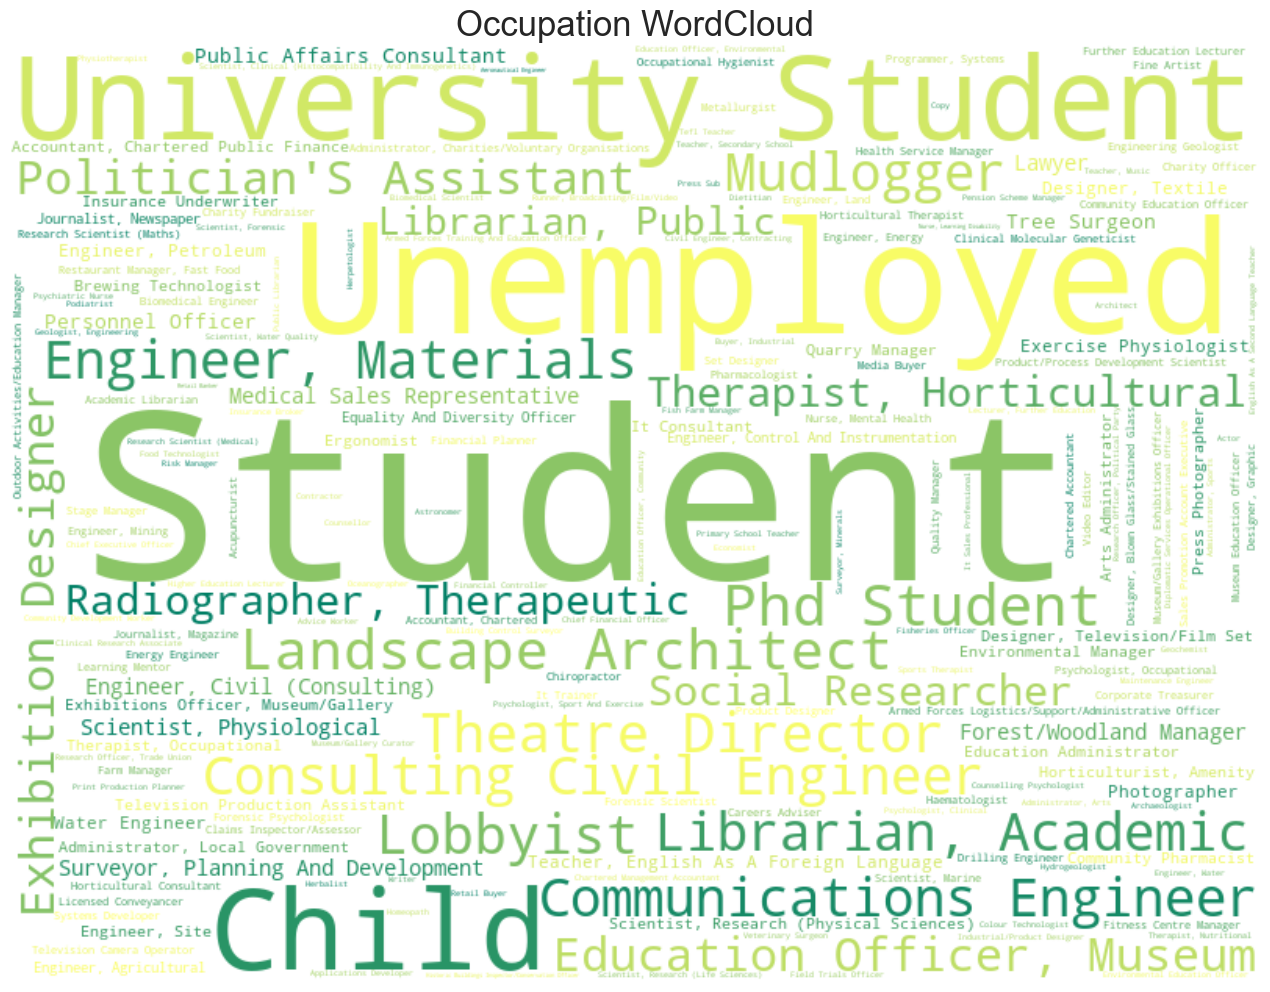

In [196]:
# Step 1: Extract the occupation column and convert it to a list
occupations = census_data_copy["Occupation"].dropna().tolist()

# Step 2: Create a Counter to count occurrences of each occupation
occupation_counts = Counter(occupations)

# Step 5: Generate the WordCloud using all occupations
wordcloud = WordCloud(width=800, height=600, background_color="white", 
                      colormap='summer').generate_from_frequencies(occupation_counts)

# Step 6: Display the WordCloud
plt.figure(figsize=(18, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Occupation WordCloud', fontsize=25)
plt.tight_layout(pad=1)
plt.show()


In [197]:
# Step 1: Extract the occupation column and convert it to a list
occupations = census_data_copy["Occupation"].dropna().tolist()

# Step 2: Create a Counter to count occurrences of each occupation
occupation_counts = Counter(occupations)

# Step 3: Top 10 Occupation Table (Counts and Percentage)
top_occupations = census_data_copy['Occupation'].value_counts().head(10)
top_occupation_df = pd.DataFrame({
    'Occupation': top_occupations.index,
    'Count': top_occupations.values,
    'Percentage (%)': (top_occupations.values / population_size * 100).round(2)
})

# Step 4: Display the Top 10 Occupations - ***MAKE SURE THIS IS THE LAST LINE OF THE CELL***
top_occupation_df


,Occupation,Count,Percentage (%)
0,Student,1667,19.65
1,Unemployed,548,6.46
2,University Student,541,6.38
3,Child,497,5.86
4,Phd Student,17,0.20
5,Landscape Architect,16,0.19
6,Theatre Director,15,0.18
7,Lobbyist,15,0.18
8,"Librarian, Academic",14,0.17
9,Communications Engineer,14,0.17


#### Unemployed 

In [198]:
# Filter the data to include only unemployed people
unemployed_data = census_data_copy[census_data_copy['Occupation'] == 'Unemployed']
unemployed_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band
3,2,Marsh Turnpike,Katie,Stephenson,53,Wife,Married,Female,Unemployed,Healthy,Christian,50-59
22,8,Marsh Turnpike,Laura,Noble,77,Head,Widowed,Female,Unemployed,Healthy,Christian,70-79
35,13,Marsh Turnpike,Emily,Lowe,55,Head,Single,Female,Unemployed,Healthy,Christian,50-59
37,13,Marsh Turnpike,Dale,Reed,30,Visitor,Single,Male,Unemployed,Healthy,Christian,30-39
41,14,Marsh Turnpike,Joe,Mann,54,Visitor,Single,Male,Unemployed,Healthy,Christian,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1,Castor Fort,Kathryn,Williams,41,Head,Divorced,Female,Unemployed,Healthy,Christian,40-49
8444,1,Cooper Granary,Carolyn,Archer,41,Daughter,Single,Female,Unemployed,Healthy,Christian,40-49
8460,1,Smith Institute,Marian,Smith,27,Daughter,Divorced,Female,Unemployed,Healthy,Christian,20-29
8468,1,Hollywood Windmill,Nicole,Stephens,52,Daughter,Single,Female,Unemployed,Healthy,Christian,50-59


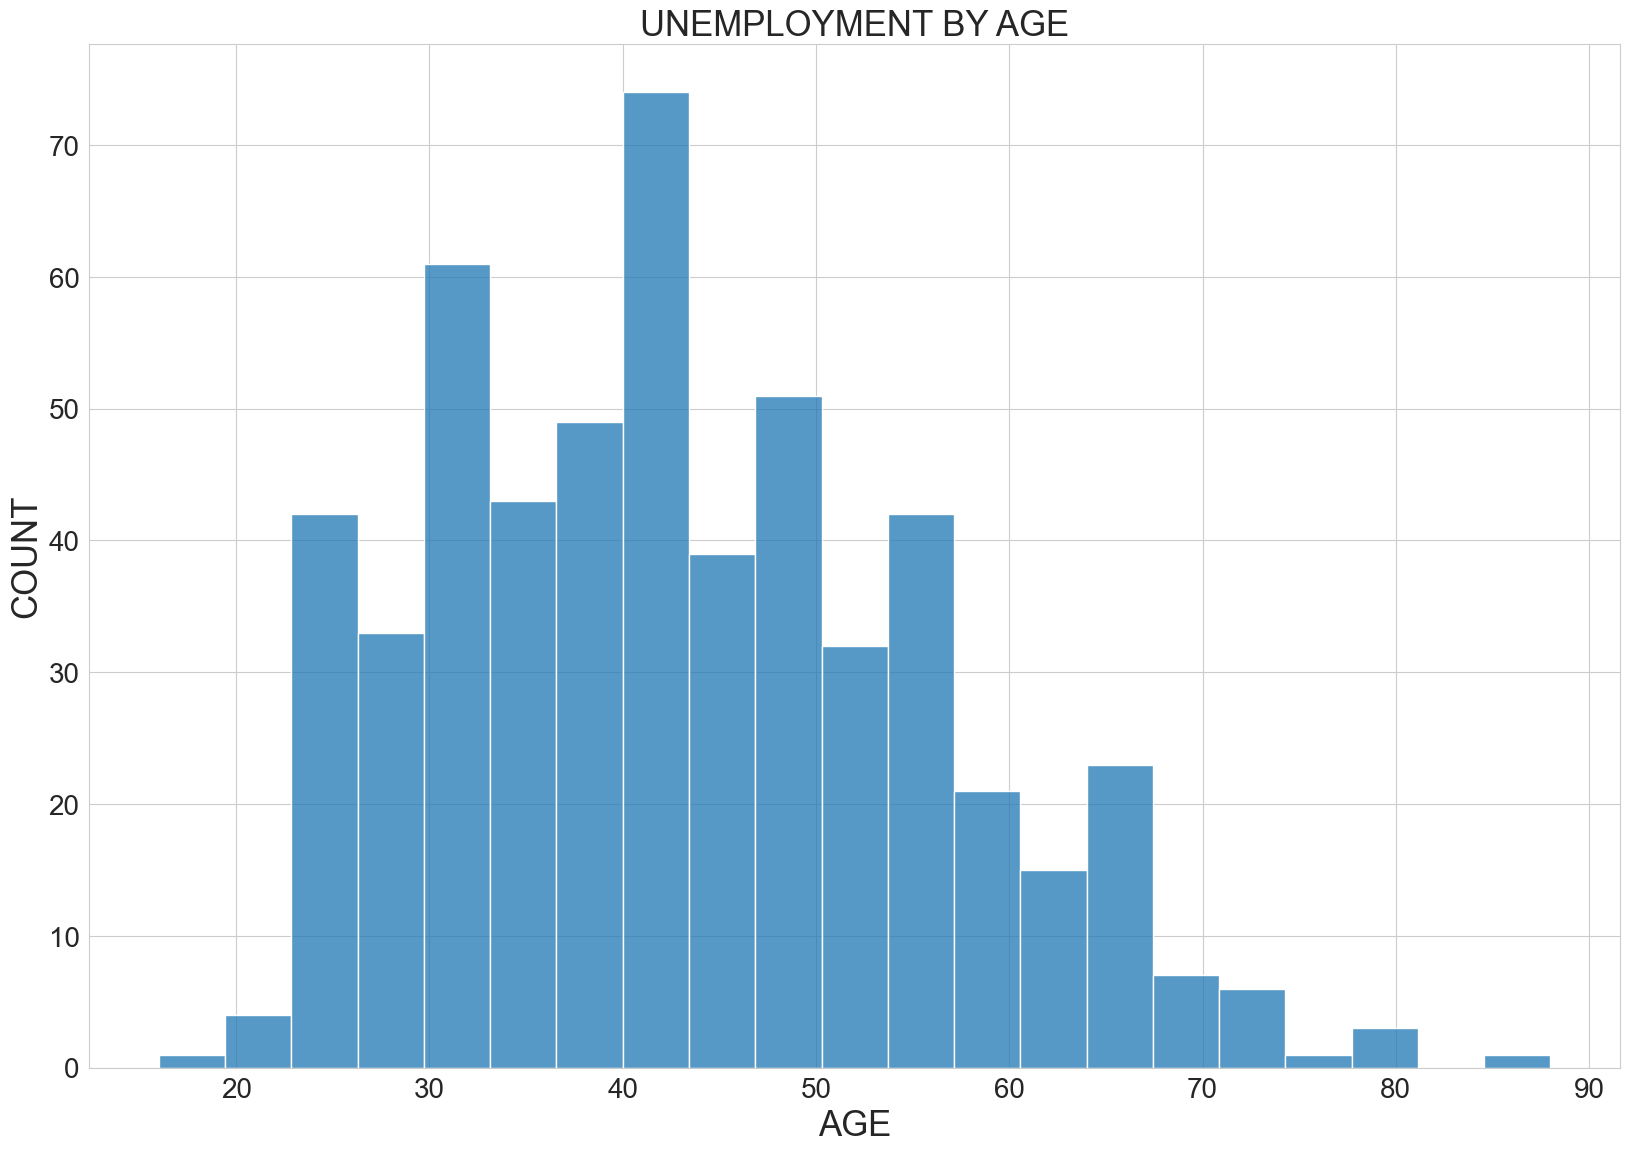

In [199]:
# Create a histogram to show the distribution of unemployment by age
unemployed_age_plot = sns.displot(data=unemployed_data, x='Age', bins=num_bins, kde=False)
plt.title('UNEMPLOYMENT BY AGE', fontsize=title_fontsize)
plt.xlabel('AGE', fontsize=label_fontsize)
plt.ylabel('COUNT', fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.gcf().set_size_inches(size_inches)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches)
plt.axis("on")

plt.show()# Display the plot

#add to created plots
created_plots['unemployed_age_plot'] = unemployed_age_plot

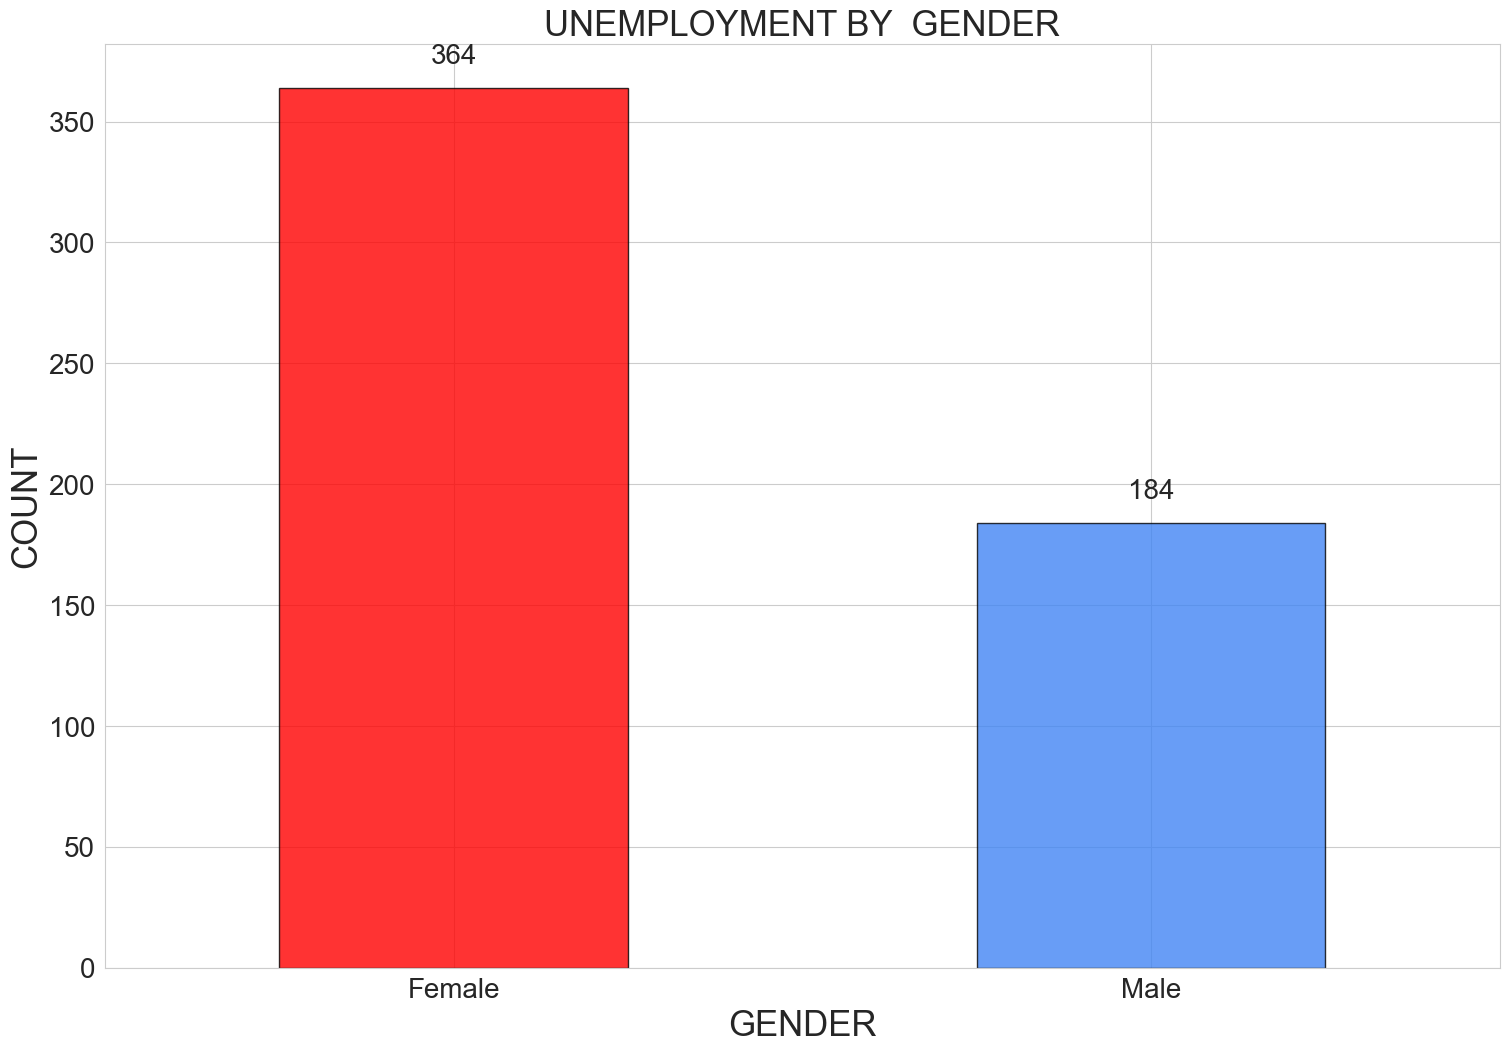

In [200]:
unemployed_gender_counts = unemployed_data['Gender'].value_counts().to_frame().reset_index()

# Rename the columns
unemployed_gender_counts.columns = ['Gender', 'Count']

# Create the bar plot
fig, ax = plt.subplots()
unemployed_gender_counts.plot.bar(x='Gender', y='Count', 
                       ax=ax, color=[secondary_color, primary_color], 
                       alpha=0.8, edgecolor='black',legend=False)
# Add the count values above each bar
for i, v in enumerate(unemployed_gender_counts['Count']):
    ax.text(i, v+10, str(v), ha='center', fontsize=params_fontsize)
    
plt.xticks(rotation=0)
plt.title('UNEMPLOYMENT BY  GENDER', fontsize=title_fontsize)
plt.xlabel('GENDER', fontsize=label_fontsize)
plt.ylabel('COUNT', fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.gcf().set_size_inches(size_inches)
plt.axis("on")

plt.savefig('./visualisation/unemployed_gender_counts.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()

In [201]:
# unemployed  age stats
unemployed_age_stats = unemployed_data['Age'].describe().to_frame().transpose().round()
unemployed_age_stats

,count,mean,std,min,25%,50%,75%,max
Age,548.0,43.0,13.0,16.0,33.0,42.0,52.0,88.0


In [202]:
# unemployment gender percentage 
unemployed_gender_percent = (census_data_copy[census_data_copy['Occupation'] == "Unemployed"]['Gender'].value_counts(normalize=True)*100).round(2)

print(f"Unemployed Males : {unemployed_gender_percent[1]}%")
print(f"Unemployed Females: {unemployed_gender_percent[0]}%")


Unemployed Males : 33.58%
Unemployed Females: 66.42%


**Unemployment Rate = (People unemployed / Labor force) × 100**

In [203]:
labor_force = len(census_data_copy[census_data_copy['Age'].between(16,65)])
unemployment_rate = (len(unemployed_data)/ labor_force) * 100
print(f"Unemployment Rate: {unemployment_rate:.2f}%")

Unemployment Rate: 9.33%


#### Retired

In [204]:
# get retired Individuals Filter the data to include only retired people
search_value = 'Retired'
retired_individuals = census_data_copy[census_data_copy['Occupation'].str.contains(search_value)]
retired_individuals

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band
54,18,Marsh Turnpike,William,Black,81,Head,Widowed,Male,Retired Midwife,Healthy,Catholic,80-89
60,20,Marsh Turnpike,Charles,Williams-Barnes,78,Head,Married,Male,Retired Information Officer,Healthy,Christian,70-79
61,20,Marsh Turnpike,Natasha,Williams-Barnes,77,Wife,Married,Female,"Retired Scientist, Biomedical",Healthy,Christian,70-79
81,26,Marsh Turnpike,Ruth,Davis,85,Head,Married,Female,"Retired Engineer, Maintenance",Healthy,Christian,80-89
82,26,Marsh Turnpike,Keith,Davis,88,Husband,Married,Male,"Retired Administrator, Charities/Voluntary Org...",Healthy,Christian,80-89
...,...,...,...,...,...,...,...,...,...,...,...,...
8451,1,Farthing Bastion,Claire,Shaw,68,Head,Widowed,Female,"Retired Production Designer, Theatre/Televisio...",Healthy,Christian,60-69
8453,1,Juniper Inn,Katy,Slater,72,Head,Married,Female,Retired Prison Officer,Healthy,Christian,70-79
8454,1,Juniper Inn,Stanley,Slater,75,Husband,Married,Male,Retired Sports Administrator,Healthy,Christian,70-79
8463,1,Hollywood Windmill,Irene,Stephens,87,Head,Single,Female,Retired Water Quality Scientist,Healthy,Christian,80-89


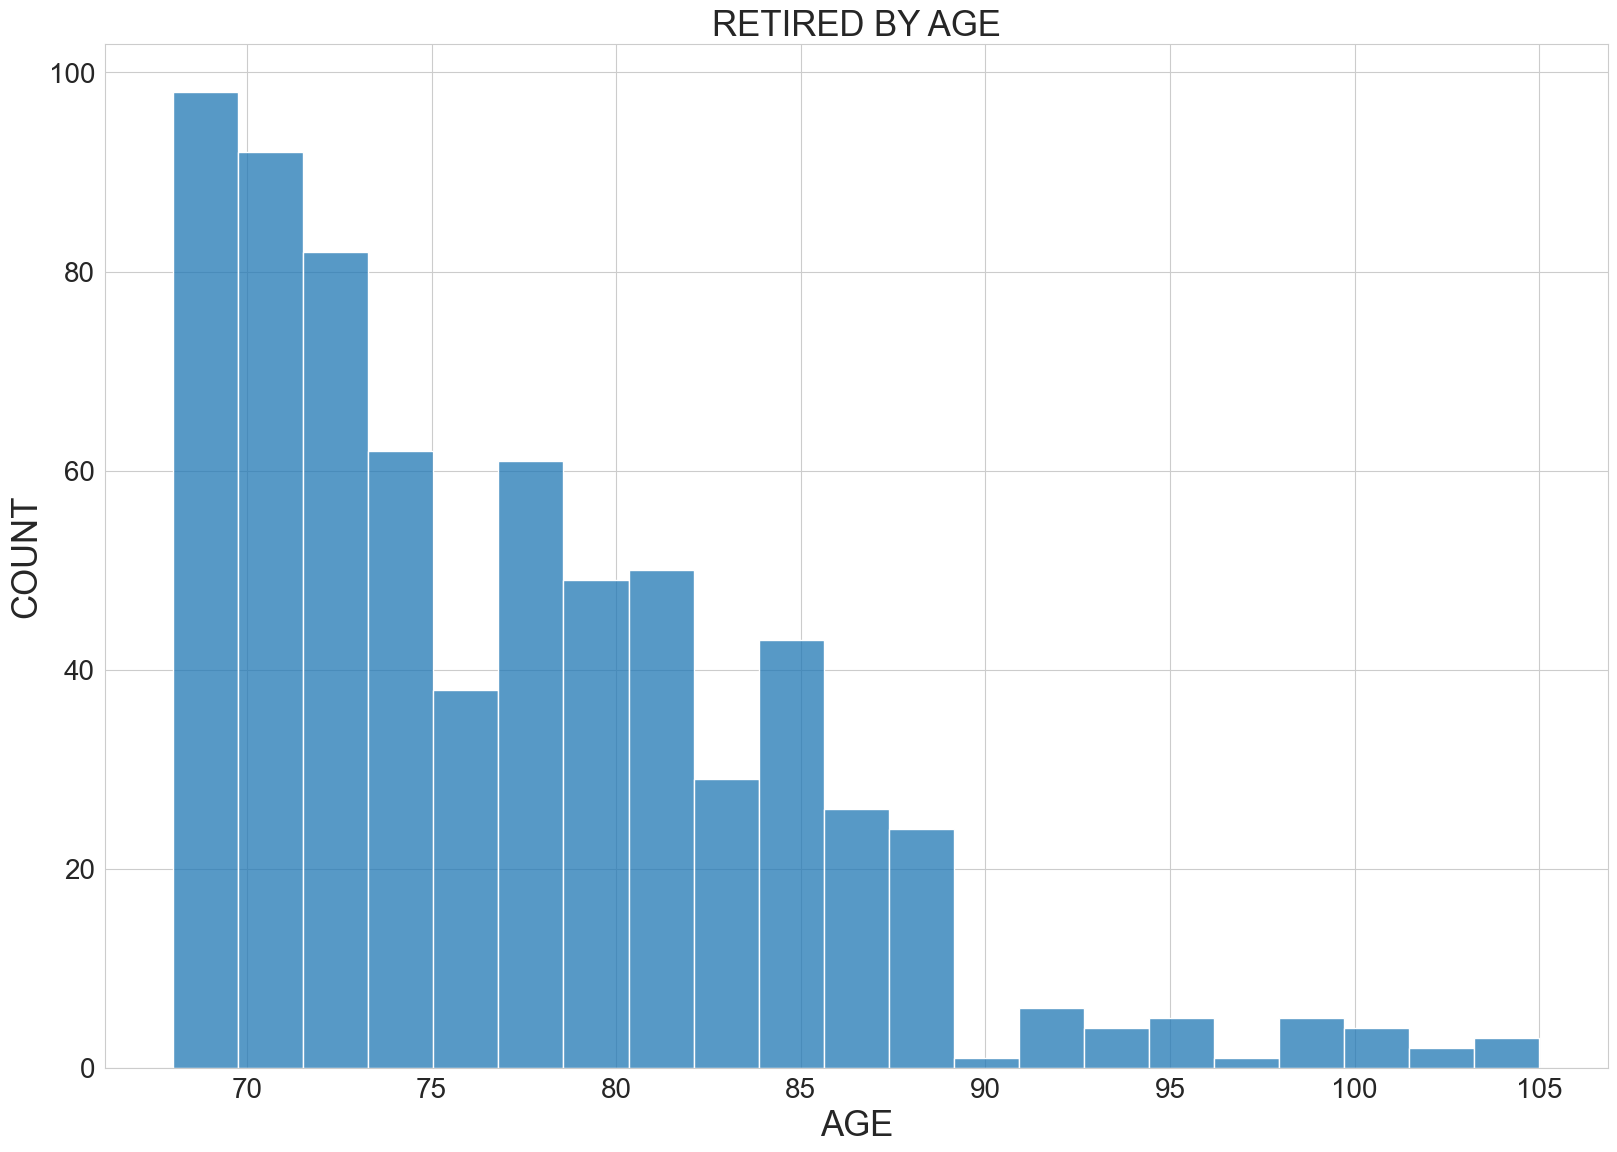

In [205]:
# Create a histogram to show the distribution of unemployment by age
retired_age_plot = sns.displot(data=retired_individuals, x='Age', bins=num_bins, kde=False)
plt.title('RETIRED BY AGE', fontsize=title_fontsize)
plt.xlabel('AGE', fontsize=label_fontsize)
plt.ylabel('COUNT', fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.gcf().set_size_inches(size_inches)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches)
plt.axis("on")

plt.show()# Display the plot

#add to created plots
created_plots['retired_age_plot'] = retired_age_plot

In [206]:
# retired Age Stats
retired_individuals['Age'].describe().to_frame().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,685.0,77.01,7.3,68.0,71.0,76.0,82.0,105.0


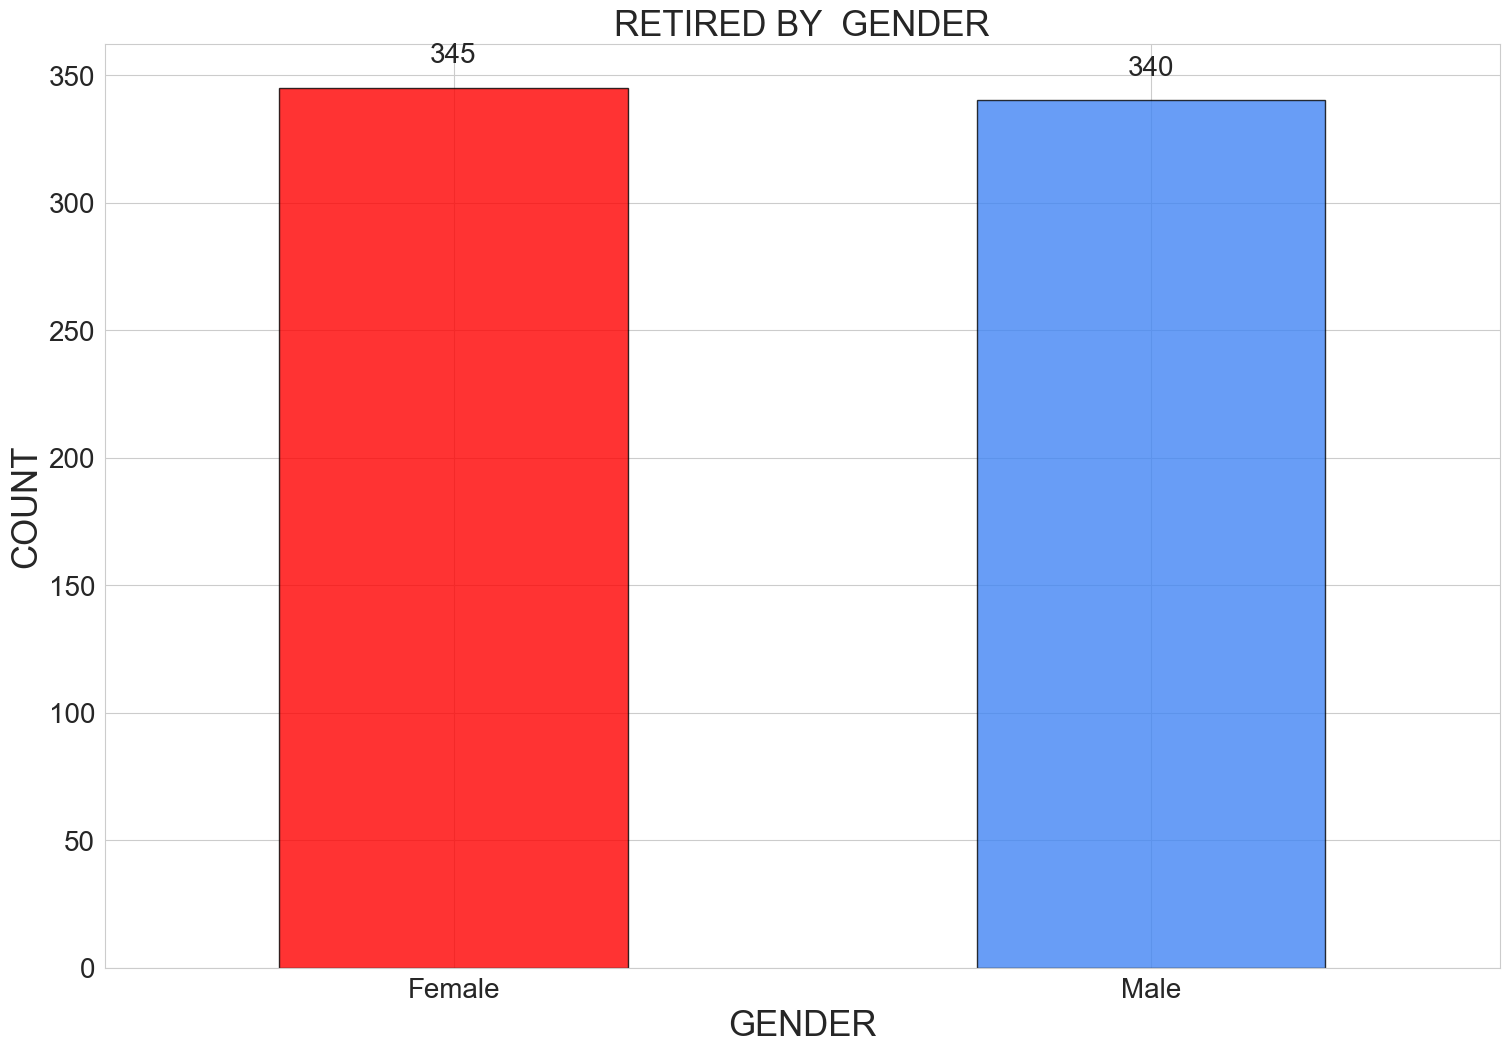

In [207]:
retired_gender_counts = retired_individuals['Gender'].value_counts().to_frame().reset_index()

# Rename the columns
retired_gender_counts.columns = ['Gender', 'Count']

# Create the bar plot
fig, ax = plt.subplots()
retired_gender_counts.plot.bar(x='Gender', y='Count', 
                       ax=ax, color=[secondary_color, primary_color], 
                       alpha=0.8, edgecolor='black',legend=False)
# Add the count values above each bar
for i, v in enumerate(retired_gender_counts['Count']):
    ax.text(i, v+10, str(v), ha='center', fontsize=params_fontsize)
    
plt.xticks(rotation=0)
plt.title('RETIRED BY  GENDER', fontsize=title_fontsize)
plt.xlabel('GENDER', fontsize=label_fontsize)
plt.ylabel('COUNT', fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.gcf().set_size_inches(size_inches)
plt.axis("on")

plt.savefig('./visualisation/retired_gender_counts.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()

In [208]:
# unemployment gender percentage 
retired_gender_percent = (retired_individuals['Gender'].value_counts(normalize=True)*100).round(2)

print(f"Retired Males : {retired_gender_percent[1]}% of the Population")
print(f"Retired Females: {retired_gender_percent[0]}% of the Population")

Retired Males : 49.64% of the Population
Retired Females: 50.36% of the Population


In [209]:
# retired population percentage
retired_population_percent = (len(census_data_copy[census_data_copy['Occupation'].str.contains(search_value)])/ population_size) *100

print(f"Retired Population Percentage: {retired_population_percent:.2f}%")

Retired Population Percentage: 8.07%


#### General Occupations

In [210]:
# occuaption count
occupation_count = census_data_copy['Occupation'].value_counts().to_frame().reset_index().head(10)
occupation_count.columns = ['Occupation', 'Count']
occupation_count.transpose()

,0,1,2,3,4,5,6,7,8,9
Occupation,Student,Unemployed,University Student,Child,Phd Student,Landscape Architect,Theatre Director,Lobbyist,"Librarian, Academic",Communications Engineer
Count,1667,548,541,497,17,16,15,15,14,14


In [211]:
# top occupation population percentage
occupation_percent = (census_data_copy['Occupation'].value_counts(normalize=True)*100).to_frame().reset_index().head(10)
occupation_percent.columns = ['Occupation', 'Population Percent(%)']
occupation_percent.head(10).round(2).transpose()


,0,1,2,3,4,5,6,7,8,9
Occupation,Student,Unemployed,University Student,Child,Phd Student,Landscape Architect,Theatre Director,Lobbyist,"Librarian, Academic",Communications Engineer
Population Percent(%),19.65,6.46,6.38,5.86,0.2,0.19,0.18,0.18,0.17,0.17


### Relationship to Head of House

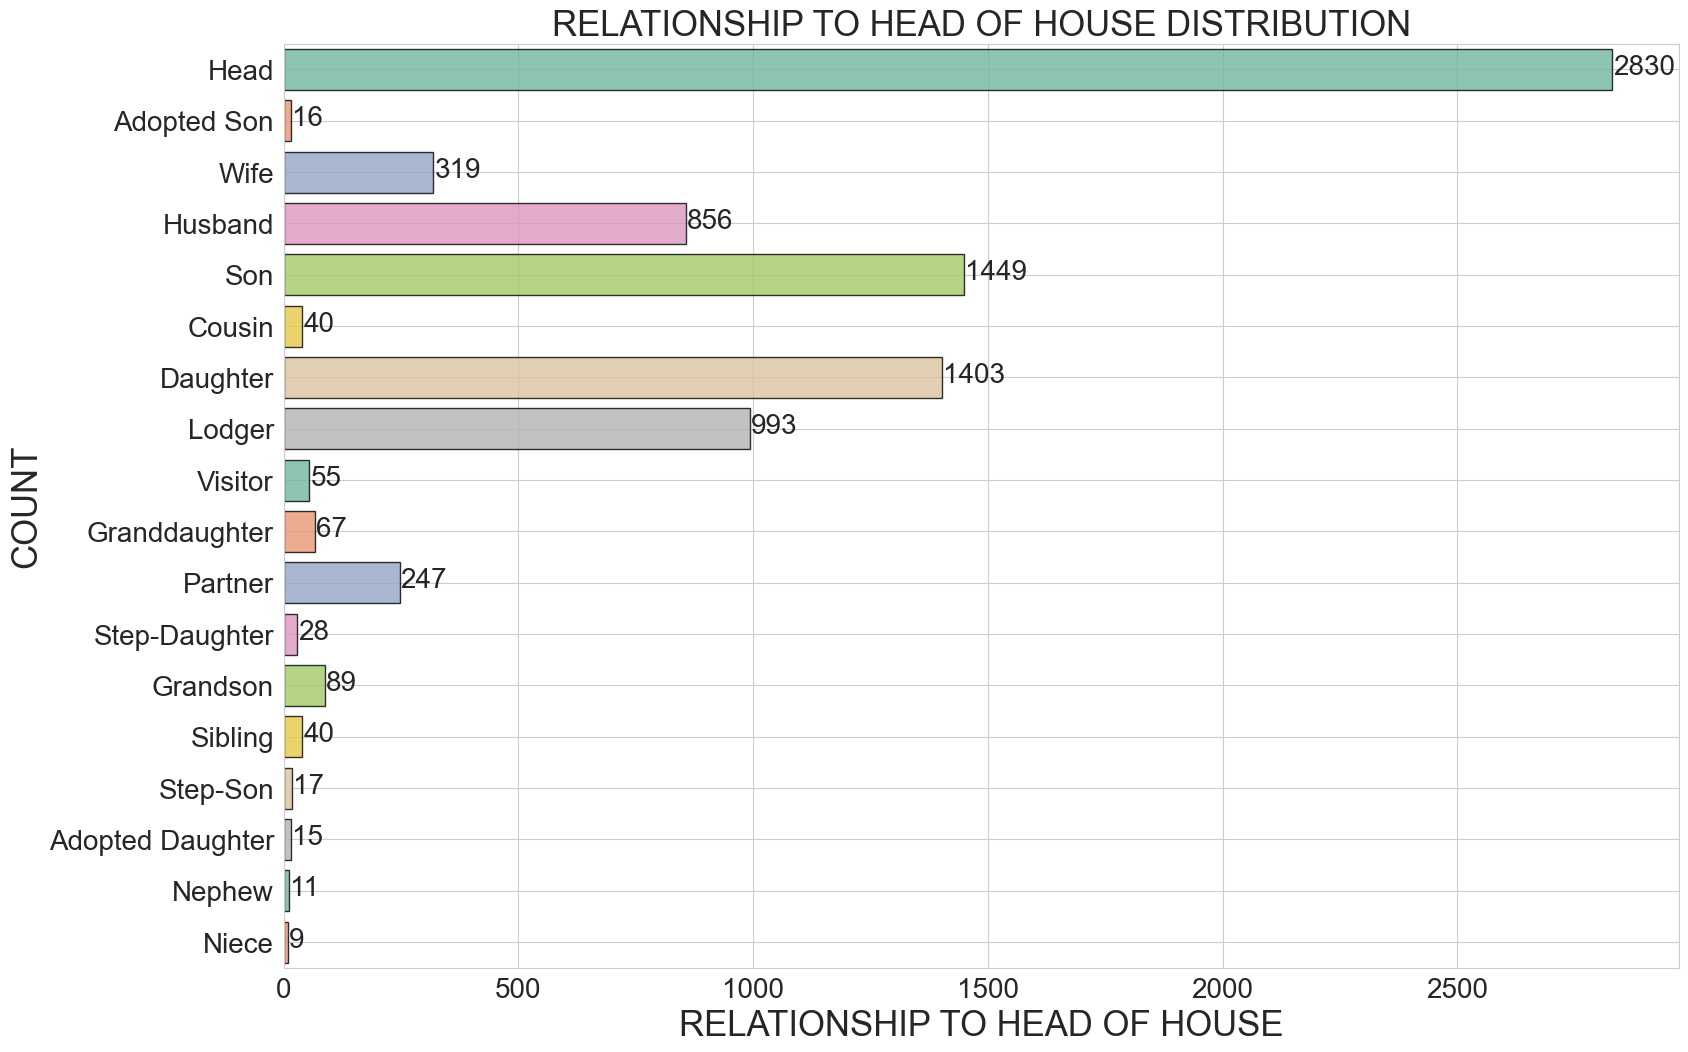

In [212]:
# ploting relationship_to_head_distribution
relationship_to_head_distribution = sns.countplot(
    y="Relationship to Head of House", 
    data=census_data_copy, palette="Set2", 
    alpha=0.8, edgecolor='black', orient='h')


# Add counts to each bar
for p in relationship_to_head_distribution.patches:
    relationship_to_head_distribution.annotate(f'{int(p.get_width())}', 
                (p.get_width()+2, p.get_y()+0.5), fontsize= params_fontsize)


# set plot title and fontsize
plt.xlabel('RELATIONSHIP TO HEAD OF HOUSE', fontsize= label_fontsize)
plt.ylabel('COUNT', fontsize= label_fontsize)
plt.tick_params(labelsize=params_fontsize)

plt.title("RELATIONSHIP TO HEAD OF HOUSE DISTRIBUTION", fontsize= title_fontsize)

# Show plot
plt.grid(axis='y')
plt.gcf().set_size_inches(size_inches) 
plt.savefig('./visualisation/relationship_to_head_distribution.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()

In [213]:
# religion population percentage
r_head_of_house_population_percent = (census_data_copy['Relationship to Head of House'].value_counts(normalize=True)*100).to_frame().reset_index()

r_head_of_house_population_percent.round(2)

,Relationship to Head of House,proportion
0,Head,33.36
1,Son,17.08
2,Daughter,16.54
3,Lodger,11.70
4,Husband,10.09
5,Wife,3.76
6,Partner,2.91
7,Grandson,1.05
8,Granddaughter,0.79
9,Visitor,0.65


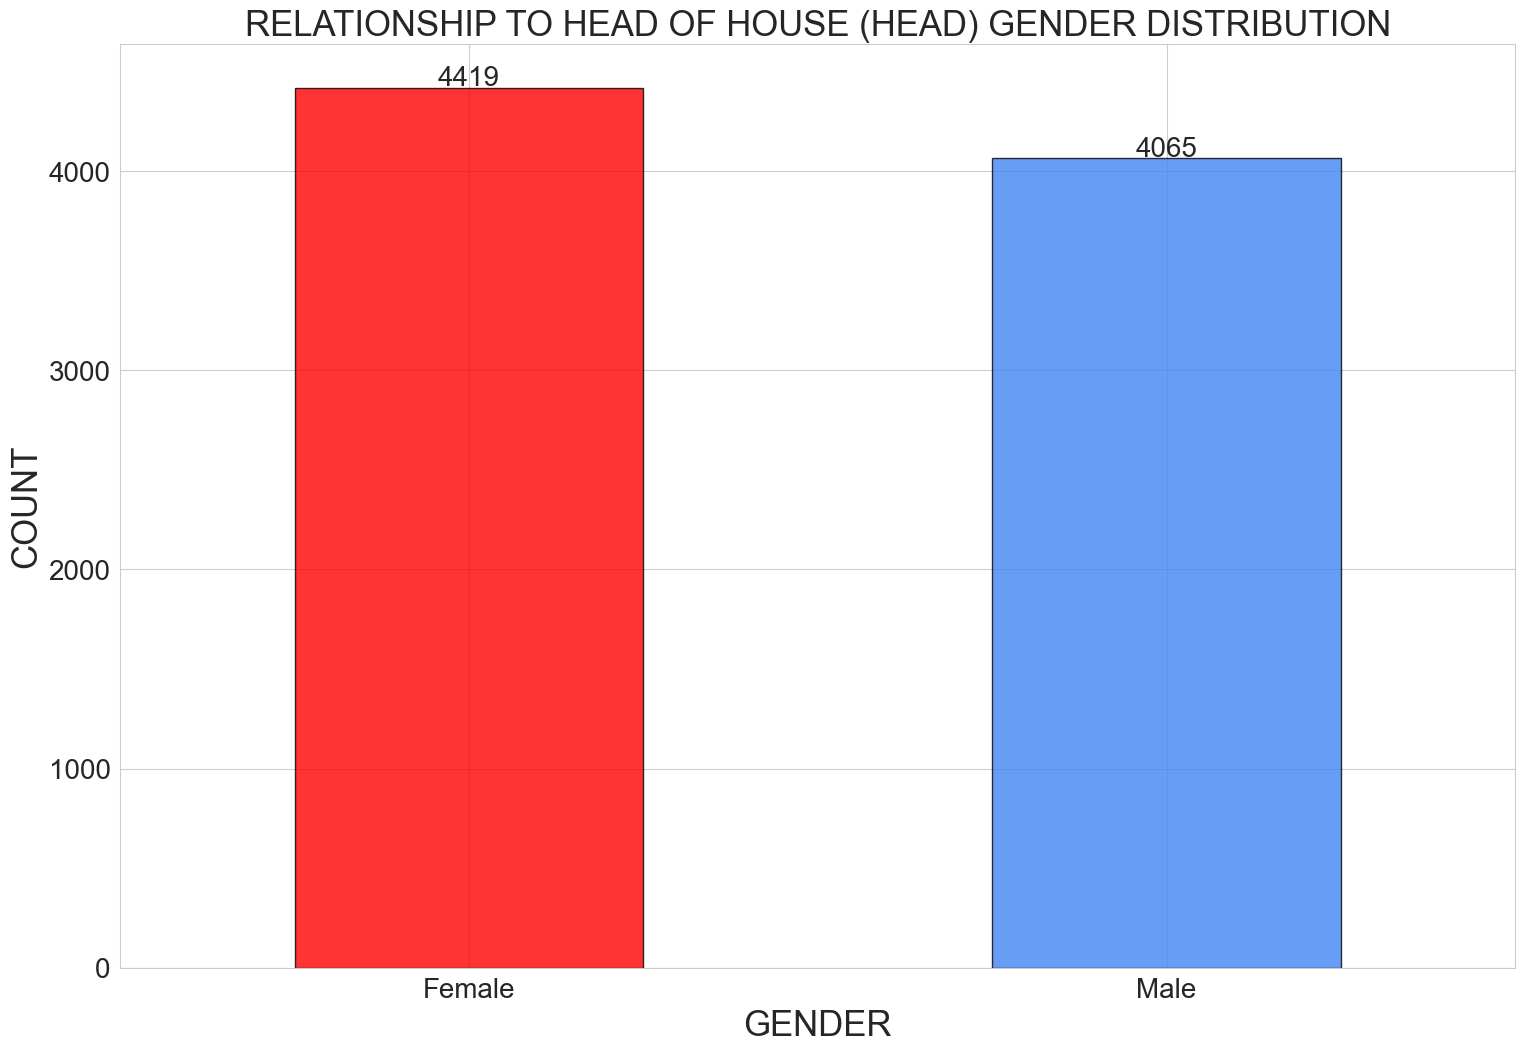

In [214]:
head_of_house_counts = census_data_copy[census_data_copy['Relationship to Head of House']=='Head']['Gender'].value_counts().to_frame().reset_index()

# Rename the columns
head_of_house_counts.columns = ['Gender', 'Count']

# Create the bar plot
fig, ax = plt.subplots()
gender_counts.plot.bar(x='Gender', y='Count', 
                       ax=ax, color=[secondary_color, primary_color], 
                       alpha=0.8, edgecolor='black',legend=False)

ax.set_xlabel('GENDER', fontsize=label_fontsize)
ax.set_ylabel('COUNT', fontsize=label_fontsize)
ax.set_title('RELATIONSHIP TO HEAD OF HOUSE (HEAD) GENDER DISTRIBUTION', fontsize=title_fontsize)
ax.tick_params(axis='both', labelsize=params_fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the count values above each bar
for i, v in enumerate(gender_counts['Count']):
    ax.text(i, v+10, str(v), ha='center', fontsize=params_fontsize)

# Add a horizontal grid

plt.xticks(rotation=0)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches) # gcf() stands for get current figure
ax.yaxis.grid(True)
# Show the plot
plt.savefig('./visualisation/head_of_house_counts.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()

### Commuters

Commuters in this case are individuals who are University Students, PhD Students, Students, Visitors and Lodgers.

In [215]:
# defining commuters
commuters = census_data_copy[(census_data_copy['Occupation'].isin(["University Student","PhD Student"]))  | 
                             (census_data_copy['Relationship to Head of House'].isin(['Visitor','Lodger'])) ]

commuters

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band
36,13,Marsh Turnpike,Andrea,King,41,Lodger,Single,Female,"Surveyor, Quantity",Healthy,Christian,40-49
37,13,Marsh Turnpike,Dale,Reed,30,Visitor,Single,Male,Unemployed,Healthy,Christian,30-39
38,13,Marsh Turnpike,Ricky,Smith,37,Lodger,Single,Male,Personnel Officer,Healthy,Christian,30-39
39,13,Marsh Turnpike,Christine,Taylor,36,Lodger,Single,Female,Editorial Assistant,Healthy,Christian,30-39
41,14,Marsh Turnpike,Joe,Mann,54,Visitor,Single,Male,Unemployed,Healthy,Christian,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...
8439,1,King Bastion,Patrick,Young,42,Lodger,Single,Male,"Designer, Blown Glass/Stained Glass",Healthy,Catholic,40-49
8440,1,King Bastion,Damien,Allen,58,Lodger,Single,Male,"Designer, Textile",Healthy,Christian,50-59
8441,1,King Bastion,Gillian,Robson,61,Lodger,Single,Female,Historic Buildings Inspector/Conservation Officer,Healthy,Christian,60-69
8442,1,King Bastion,Paula,Lawrence,21,Lodger,Single,Female,University Student,Healthy,Catholic,20-29


In [216]:
commuters_percent = round((len(commuters) / population_size) * 100, 2)
print(f"{commuters_percent}% of the Population are Commuters")

16.4% of the Population are Commuters


### Infirmity 

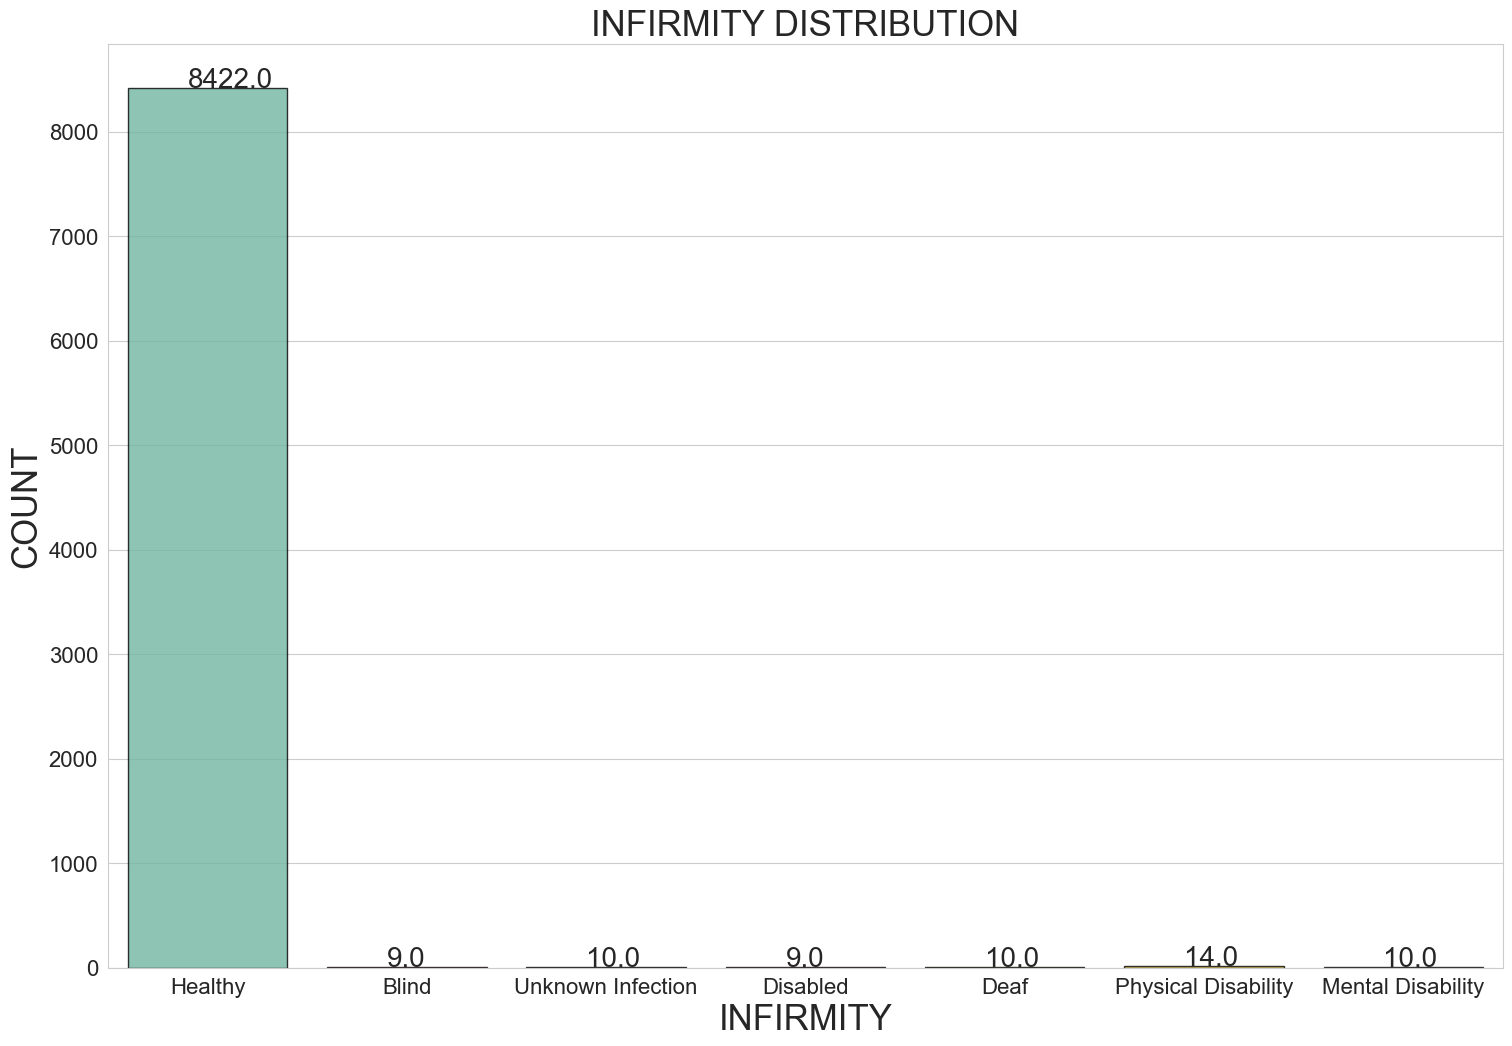

In [217]:
# religion distribution plot
sns.axes_style('whitegrid')
infirmity_plot = sns.countplot(
    x="Infirmity", data=census_data_copy, palette="Set2", alpha=0.8, edgecolor='black')

# Add counts to each bar
for p in infirmity_plot.patches:
    infirmity_plot.annotate(f'{p.get_height()}', 
                (p.get_x()+0.3, p.get_height()+5), fontsize= params_fontsize)


# set plot title and fontsize
plt.xlabel('INFIRMITY', fontsize= label_fontsize)
plt.ylabel('COUNT', fontsize= label_fontsize)
plt.tick_params(labelsize=params_fontsize-4)

plt.title("INFIRMITY DISTRIBUTION", fontsize= title_fontsize)

# Show plot

plt.gcf().set_size_inches(size_inches) 
plt.savefig('./visualisation/infirmity_plot.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()

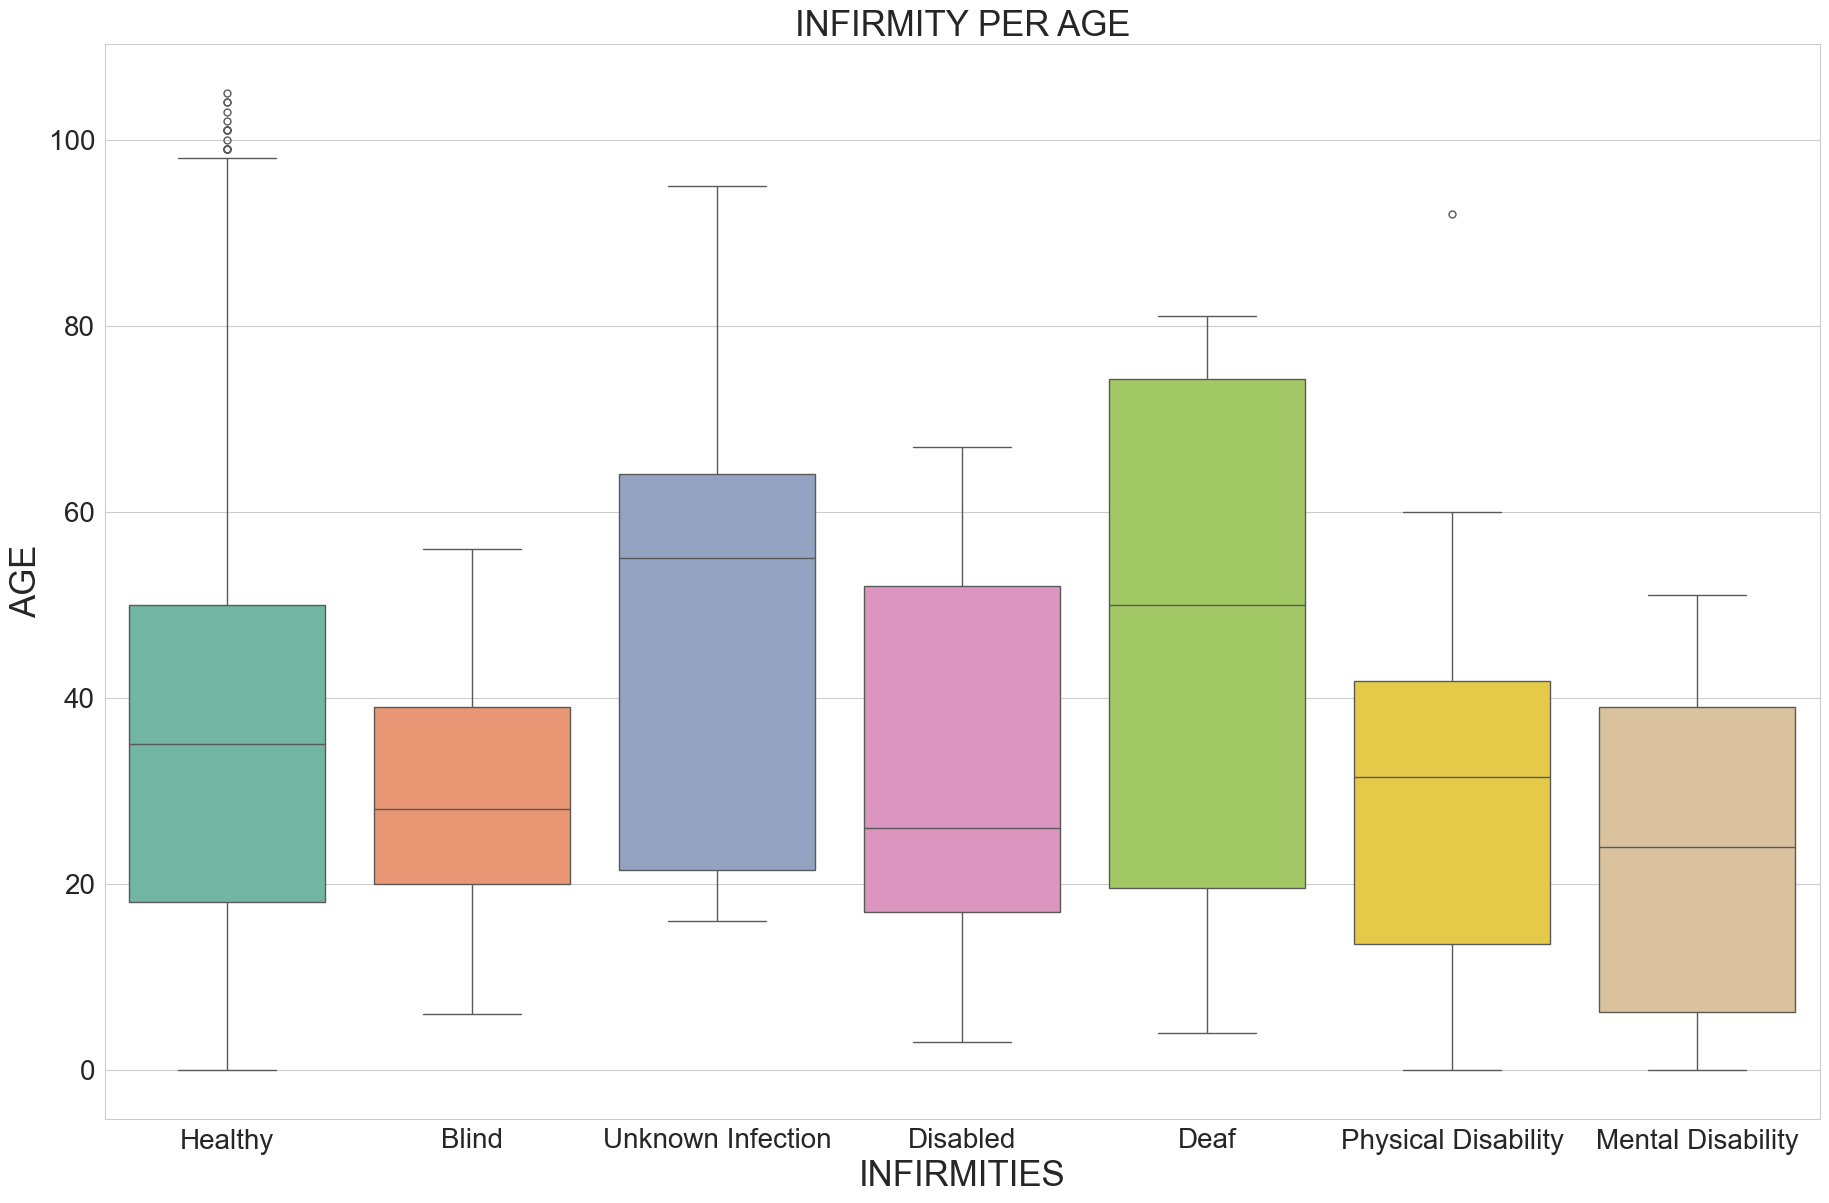

In [218]:
# Plot a box and whisker plot for the age range per religion
age_infirmity_plot = sns.catplot(kind="box", aspect=2.5, x="Infirmity",
                                 height=7,  y="Age", data=census_data_copy, palette='Set2')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels to the plot
plt.title("INFIRMITY PER AGE", fontsize=title_fontsize)
plt.xlabel("INFIRMITIES", fontsize=label_fontsize)
plt.ylabel("AGE", fontsize=label_fontsize)
plt.tick_params(labelsize=params_fontsize)
plt.xticks(rotation=0)
# Show the plot
plt.gcf().set_size_inches(size_inches)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gcf().set_size_inches(size_inches)
plt.show()

#add to created plots
created_plots['age_infirmity_plot'] = age_infirmity_plot
plt.show()

In [219]:
# infimity counts.
infirmity_counts = census_data_copy['Infirmity'].value_counts().reset_index()
infirmity_counts.columns = ['Infirmity', 'Counts']
infirmity_counts.transpose()

,0,1,2,3,4,5,6
Infirmity,Healthy,Physical Disability,Unknown Infection,Deaf,Mental Disability,Blind,Disabled
Counts,8422,14,10,10,10,9,9


In [220]:
(census_data_copy['Infirmity'].value_counts(normalize=True)*100).to_frame().transpose().reset_index().round(2)


Infirmity,index,Healthy,Physical Disability,Unknown Infection,Deaf,Mental Disability,Blind,Disabled
0,proportion,99.27,0.17,0.12,0.12,0.12,0.11,0.11


In [221]:
# Calculate the average age of healthy individuals
healthy_avg_age = round(census_data_copy[census_data_copy['Infirmity'] == 'Healthy']['Age'].mean())
print(f"Average age of an Individual classified as Healthy: {healthy_avg_age} years")


Average age of an Individual classified as Healthy: 35 years


### Streets & House Number

In [222]:
# Define Number of Hosuse per street
street_houses_counts = census_data_copy.groupby('Street')['House Number'].nunique()

In [223]:
# street houses
street_houses = pd.DataFrame(street_houses_counts.sort_values(ascending=False)).reset_index()
street_houses.columns = ['Street', 'Number of Houses']
street_houses

,Street,Number of Houses
0,Orchard Crescent,187
1,Upland Street,119
2,Capricornhall Lane,92
3,Kemp Drive,60
4,Scott Union,59
...,...,...
99,Hollywood Windmill,1
100,Smith Institute,1
101,Juniper Inn,1
102,Nixon Tower,1


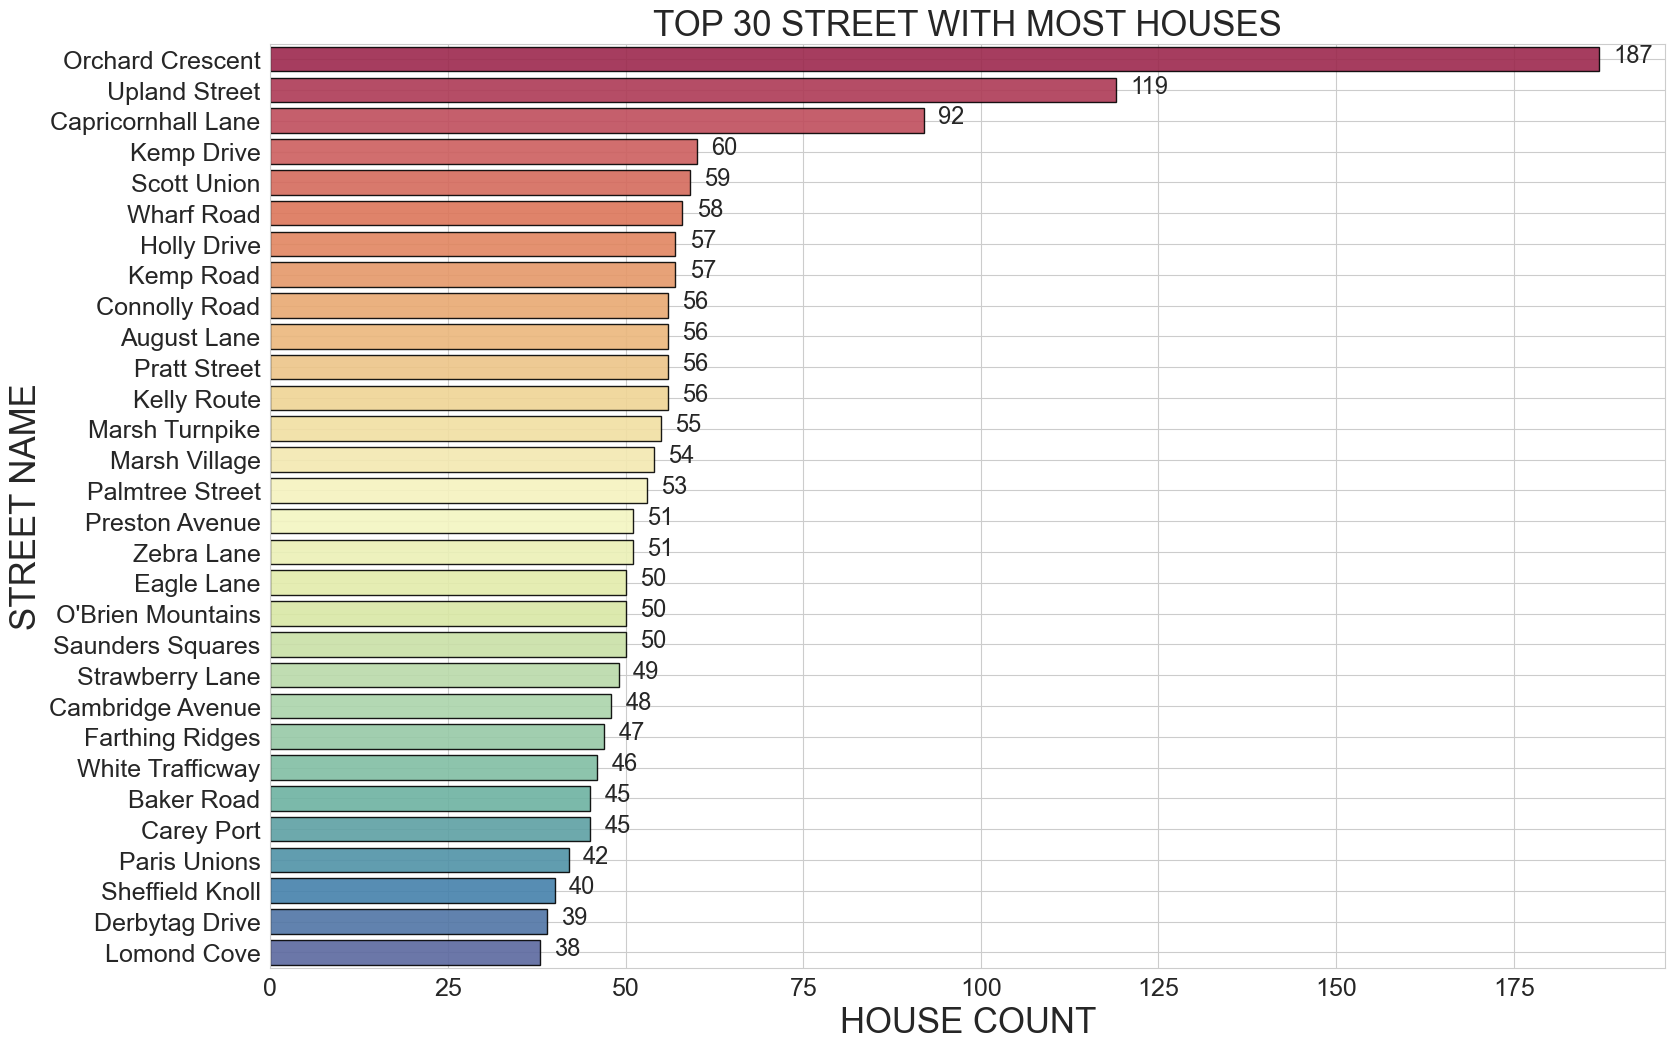

In [224]:
# Create the plot for street_houses_top_3
street_houses_top_30 = sns.barplot(data=street_houses.head(30), 
                                   y='Street', x='Number of Houses', palette='Spectral',
                                  alpha=0.9, edgecolor='black')

# Add counts to each bar
for p in street_houses_top_30.patches:
    street_houses_top_30.annotate(f'{int(p.get_width())}', 
                (p.get_width()+2, p.get_y()+0.5), fontsize= params_fontsize-3)
plt.xlabel('HOUSE COUNT', fontsize= label_fontsize)
plt.ylabel('STREET NAME',fontsize= label_fontsize)
plt.title('TOP 30 STREET WITH MOST HOUSES',fontsize= title_fontsize)
plt.tick_params(labelsize=params_fontsize-2)
plt.grid(axis='y')
plt.gcf().set_size_inches(size_inches) # gcf() stands for get current figure
plt.savefig('./visualisation/street_houses_top_30.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()# Display the plot

In [225]:
street_houses['Number of Houses'].describe().to_frame().transpose().round()

,count,mean,std,min,25%,50%,75%,max
Number of Houses,104.0,27.0,27.0,1.0,8.0,20.0,43.0,187.0


In [226]:
print(f"Max house per street: {street_houses['Number of Houses'].max()}")

Max house per street: 187


In [227]:
# Define Number of Occupant Per House Per Street
house_occupants_counts = census_data_copy.groupby(['Street', 'House Number']).size().reset_index(name='Count')
house_occupants_counts.sort_values(by=['Street', 'House Number'], inplace=True)
house_occupants_counts.columns = ['Street', 'House Number', 'Occupants']
house_occupants_counts = pd.DataFrame(house_occupants_counts)
house_occupants_counts.head(10)

,Street,House Number,Occupants
0,Aethelredpart Avenue,1,6
1,Aethelredpart Avenue,2,5
2,Aethelredpart Avenue,3,4
3,Aethelredpart Avenue,4,4
4,Aethelredpart Avenue,5,4
5,Aethelredpart Avenue,6,1
6,Aethelredpart Avenue,7,4
7,Aethelredpart Avenue,8,4
8,Alexander Drive,1,3
9,Alexander Drive,2,1


In [228]:
house_occupants_counts['Occupants'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Occupants,2820.0,3.008511,1.938007,1.0,2.0,3.0,4.0,22.0


In [229]:
# Defining Population per Street
population_per_street = pd.DataFrame(
    house_occupants_counts.groupby('Street')
    ['Occupants']
    .sum()
    .reset_index(name='Population Per Street')
)
population_per_street = population_per_street.sort_values('Population Per Street',
                                                          ascending=False).reset_index(drop=True)
population_per_street

,Street,Population Per Street
0,Upland Street,734
1,Orchard Crescent,603
2,Kelly Route,351
3,Capricornhall Lane,306
4,White Trafficway,283
...,...,...
99,Fleet Villa,3
100,Clark Farmhouse,2
101,Dixon Institute,2
102,Farthing Bastion,2


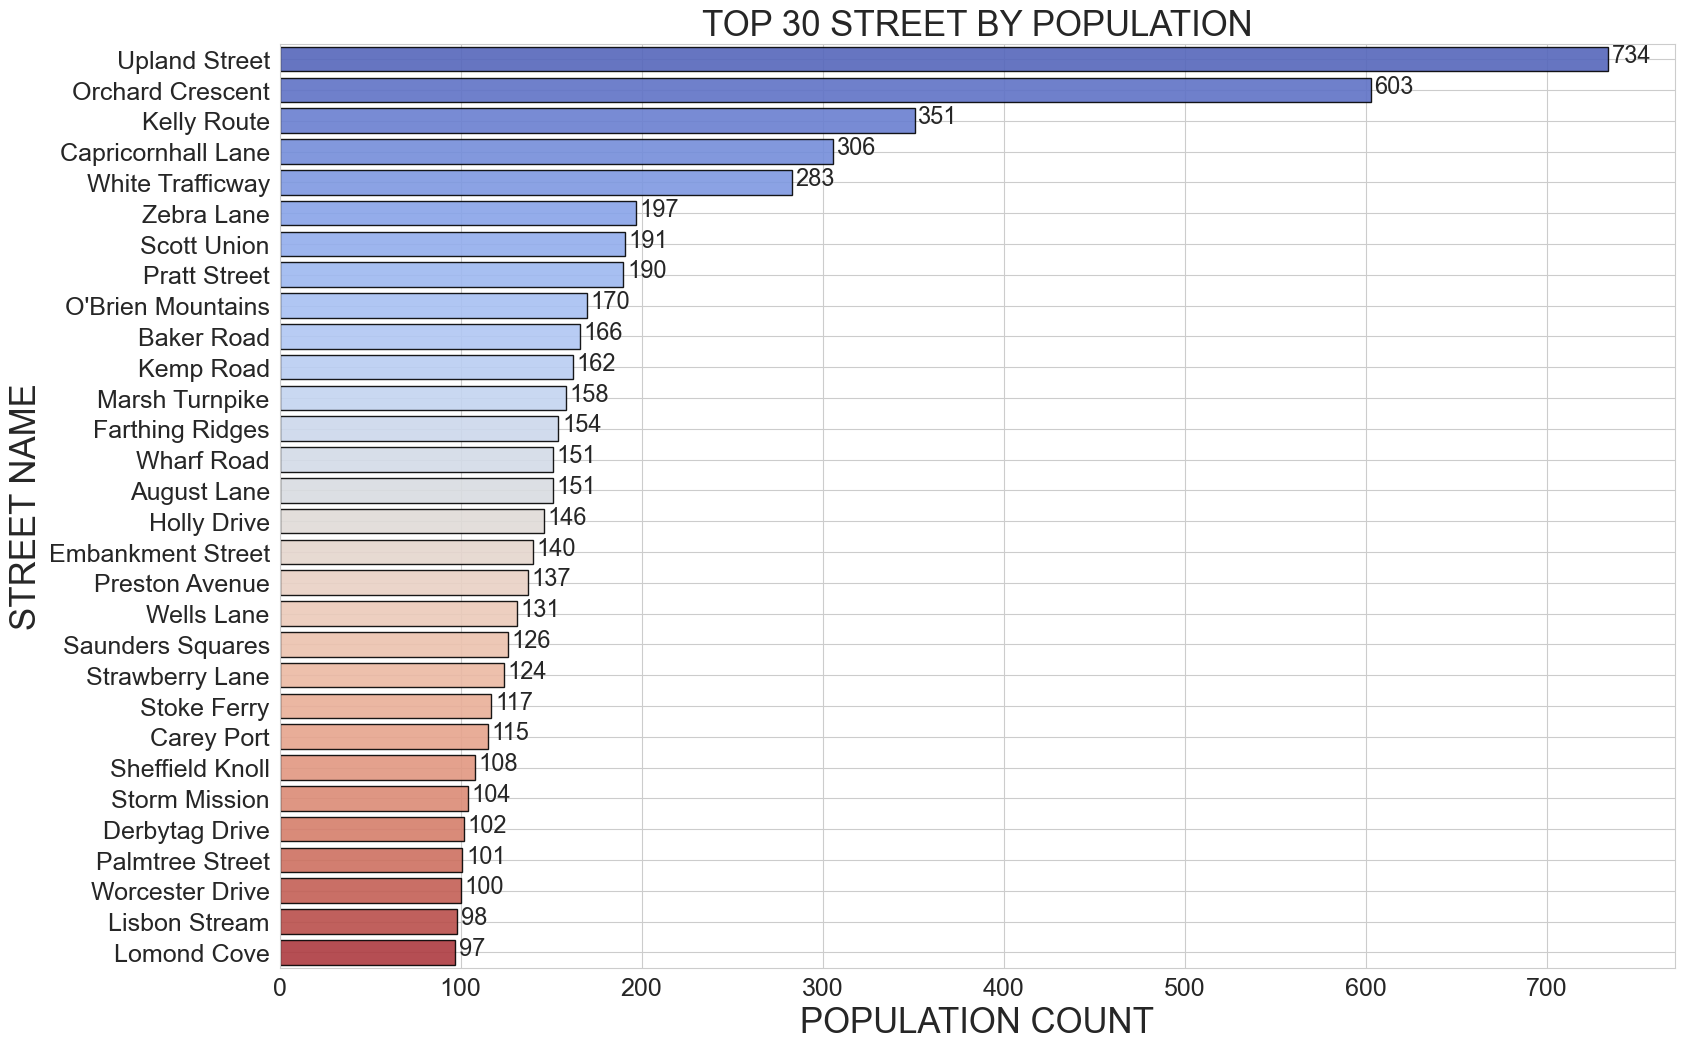

In [230]:
# Create the plot using population_per_street_top_30
population_per_street_top_30 = sns.barplot(data=population_per_street.head(30), 
                                   y='Street', x='Population Per Street', palette='coolwarm',
                                  alpha=0.9, edgecolor='black')

# Add counts to each bar
for p in population_per_street_top_30.patches:
    population_per_street_top_30.annotate(f'{int(p.get_width())}', 
                (p.get_width()+2, p.get_y()+0.5), fontsize= params_fontsize-3)
plt.xlabel('POPULATION COUNT', fontsize= label_fontsize)
plt.ylabel('STREET NAME',fontsize= label_fontsize)
plt.title('TOP 30 STREET BY POPULATION',fontsize= title_fontsize)
plt.tick_params(labelsize = params_fontsize-2)
plt.grid(axis='y')
plt.gcf().set_size_inches(size_inches) # gcf() stands for get current figure
plt.savefig('./visualisation/population_per_street_top_30.png',
                    dpi=70, bbox_inches='tight', format='png', transparent = True)
plt.show()# Display the plot


In [231]:
population_per_street['Population Per Street'].describe().to_frame().transpose().round()

,count,mean,std,min,25%,50%,75%,max
Population Per Street,104.0,82.0,107.0,1.0,19.0,52.0,101.0,734.0


In [232]:
# get population stats
avg_population_per_street = round(population_per_street['Population Per Street'].mean())
most_common_population_val = population_per_street['Population Per Street'].mode()[0]

print(f"Average Population Per Street: {avg_population_per_street}")
print(f"Most Common Street Population: {most_common_population_val}")

Average Population Per Street: 82
Most Common Street Population: 5


### Birth Rate

*Birth Rate = number_of_births / population_size * 1000*

Using Formulas from [Rates & Formulas](https://hsls.libguides.com/health-data-sources/rates-formulas)

In [233]:
number_of_birth = len(census_data_copy[census_data_copy['Age'] <= 1] )

In [234]:
birt_rate = (number_of_birth / population_size) * 1000
print(f"Population Birth Rate: {birt_rate:.2f} births per 1000 people")

Population Birth Rate: 21.10 births per 1000 people


### Birth Rate (5 Years Ago)
Birth Rate = number_of_births < 5 / population_size (minus children less than 5) * 1000

In [235]:
children_born_five_years_ago =  len(census_data_copy[census_data_copy['Age'] == 5] )

population_five_years_ago =  population_size - len(census_data_copy[census_data_copy['Age'] <= 5] )

birth_rate__five_years_ago = (children_born_five_years_ago / population_five_years_ago) * 1000
print(f"Population Birth Rate 5 years Ago: {birth_rate__five_years_ago:.2f} births per 1000 people")

Population Birth Rate 5 years Ago: 14.35 births per 1000 people


In [236]:
birth_rate_growth = (birt_rate / (birt_rate + birth_rate__five_years_ago))
print(f"Birth Rate Increase: {birth_rate_growth:.2f}%")

Birth Rate Increase: 0.60%


### Death Rate
*Death Rate = estimated_life_expectancy / population_size * 1000*

In [237]:
default_age_band = 10
estimated_life_expectancy = len(census_data_copy[census_data_copy['Age'] >= 75] ) / default_age_band
death_rate = estimated_life_expectancy / population_size * 1000
print(f"Population Death Rate: {death_rate:.2f} per 1000 people")

Population Death Rate: 4.55 per 1000 people


### General fertility rate (GFR)

*(Number of live births / Female population 15-44) * 1,000*

In [238]:
female_reproductive_age = len(census_data_copy[(census_data_copy['Age'].between(15, 44)) & (census_data_copy['Gender'] =='Female')])

general_fertility_rate =  number_of_birth/female_reproductive_age * 1000
print(f"General fertility rate Rate: {general_fertility_rate:.2f} per 1000 people")

General fertility rate Rate: 82.30 per 1000 people


### Divorce rate
*(Number of divorces /population_size) * 1000*

In [239]:
number_of_divorces = int(marrital_status_count['Divorced'])
divorce_rate = (number_of_divorces / population_size) * 1000
print(f"Divorce Rate: {divorce_rate:.2f} per 1000 people")

Divorce Rate: 89.82 per 1000 people


### Marriage rate
*(Number of marriages / Estimated midyear population) * 1000*

In [240]:
number_of_marriages = int(marrital_status_count['Married'])
marraige_rate = (number_of_marriages / population_size) * 1000
print(f"Marriage Rate: {marraige_rate:.2f} per 1000 people")

Marriage Rate: 278.64 per 1000 people


 **Saving plots**

In [241]:
def save_created_plots(created_plots):
    folder_path = 'visualisation' # Create plot destination.

    try: 
        if not os.path.exists(folder_path): # Check if folder already exists
            os.mkdir(folder_path)

        for plot_name, plot_figure in created_plots.items():
            plot_figure.savefig('./' + folder_path + '/' + plot_name +'.png',
                                       dpi=70, bbox_inches='tight', format='png', 
                                       transparent = True)

        print(f"Saved Created Plots, see the '{folder_path}' folder for images.")
    except OSError as error: 
        print(error) 
    

save_created_plots(created_plots)

Saved Created Plots, see the 'visualisation' folder for images.
